In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from time import process_time 
from src.FunctionsProperties import *
import statsmodels.api as sm
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally

In [2]:
# Create folders to Results
make_results_folders()
move_to_data()

In [18]:
def remove_cod_file_column(N, dim, alpha_a, alpha_g):
    file_path =  f"../../data/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
    # Verifica se o arquivo existe
    if not os.path.exists(file_path):
        print(f"O arquivo {file_path} não existe.")
        return
    
    # Carrega o arquivo CSV
    df = pd.read_csv(file_path, delimiter=',')

    # Verifica se a coluna '#cod_file' existe
    if '#cod_file' in df.columns:
        # Remove a coluna '#cod_file'
        df = df.drop(columns=['#cod_file'])
        # Salva o arquivo novamente, sem a coluna '#cod_file'
        df.to_csv(file_path, index=False)
        print(f"Coluna '#cod_file' removida do arquivo {file_path}.")
    else:
        # Caso a coluna não exista, não faz nada
        print(f"A coluna '#cod_file' não existe no arquivo {file_path}. Nenhuma ação realizada.")
        pass

In [2]:
# ==> READ DOCUMENTATION OF FUNCTION all_properties_file(N,dim, alpha_a, alpha_g) BEFORE RUN THAT CELL!! <==
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000, 640000]
#N = [5000]
dim = [1, 2, 3, 4]

for n in N:
    for d in dim:
        all_combinations_ag =  extract_alpha_values(n, d)
        for i in range(len(all_combinations_ag)):
            try:
                # READ DOCUMENTATION BEFORE RUN THAT CELL
                all_properties_file(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
                fixing_data(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
            except FileNotFoundError:
                pass
            #remove_cod_file_column(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
clear_output()

In [43]:
def format_file(N, dim):
    
    for n in N:
        for d in dim:        
            all_combinations_ag =  extract_alpha_values(n, d)
            for i in range(len(all_combinations_ag)):
                filepath = f"../../data/N_{n}/dim_{d}/alpha_a_{all_combinations_ag[i][0]}_alpha_g_{all_combinations_ag[i][1]}/properties_set.txt"
                print(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
                    # Verifica se file é realmente uma string (caminho do arquivo) e não um arquivo aberto
                if not isinstance(filepath, str):
                    raise TypeError("O argumento 'file' deve ser uma string representando o caminho do arquivo.")
                
                # Abre o arquivo para leitura
                with open(filepath, 'r', encoding='utf-8') as file:
                    lines = file.readlines()

                formatted_lines = []
                for line in lines:
                    # Verifica se a linha já é separada por vírgulas
                    if ',' in line:
                        formatted_lines.append(line.strip())  # Remove espaços extras no final da linha
                    else:
                        # Substitui múltiplos espaços em branco por uma única vírgula
                        formatted_line = ','.join(line.split())
                        formatted_lines.append(formatted_line)
                
                # Escreve o conteúdo formatado de volta no arquivo
                with open(filepath, 'w', encoding='utf-8') as file:
                    file.write('\n'.join(formatted_lines))

In [3]:
N = [5000, 10000, 20000, 40000, 80000, 100000 ,160000, 320000]
dim = [1, 2, 3, 4]
all_data(N, dim)
#format_file(N, dim)

In [3]:
data_to_move()

In [2]:
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
df.head()

N  dim  alpha_a  alpha_g  N_samples  short_mean  short_err  short_std  \
0  5000    1      8.0      3.0         51   15.264582   0.141807   1.012706   
1  5000    1      4.0      4.0         51   14.834792   0.175089   1.250386   
2  5000    1      1.0      9.0         51   11.606915   0.150811   1.077005   
3  5000    1      2.0     14.0      29720   14.733576   0.009513   1.640035   
4  5000    1      0.0      2.0      20986    8.588004   0.003548   0.514053   

   diameter_mean  diameter_err  diameter_std  ass_coeff_mean  ass_coeff_err  \
0      36.254902      0.510166      3.643312        0.040476       0.001568   
1      35.686275      0.561853      4.012432        0.015934       0.001676   
2      28.274510      0.293830      2.098365       -0.095851       0.003681   
3      34.698822      0.023322      4.020645       -0.039872       0.000094   
4      22.601782      0.012392      1.795171       -0.075748       0.000110   

   ass_coeff_std  
0       0.011196  
1       0.011971  
2       0.026290  
3       0.016262  
4       0.015866

In [ ]:
alpha_filter = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
parameters_calculate(df, N, dim, alpha_filter)

N  dim  alpha_a  alpha_g  N_samples  short_mean  short_err  \
2376  100000    1      0.0      2.0         82   11.506457   0.060501   
2377  100000    1      1.0      2.0         82   13.887537   0.083196   
2378  100000    1      6.0      2.0         82   20.561133   0.174263   
2379  100000    1      2.0      3.0         41   17.369824   0.114348   
2380  100000    1      5.0      2.0         82   20.034932   0.145690   
...      ...  ...      ...      ...        ...         ...        ...   
2439  100000    4      2.0      9.0         41   11.388520   0.077988   
2440  100000    4      2.0      8.0         41   11.550815   0.092206   
2441  100000    4      3.0      2.0         82   11.631309   0.094123   
2442  100000    4      7.0      2.0         82   15.701794   0.087824   
2443  100000    4      2.0      1.0         41   17.405829   0.520140   

      short_std  diameter_mean  diameter_err  diameter_std  ass_coeff_mean  \
2376   0.547860      31.914634      0.213375      1.932191       -0.028713   
2377   0.753370      36.865854      0.265309      2.402479       -0.046575   
2378   1.578018      51.536585      0.926897      8.393406        0.045738   
2379   0.732183      43.048780      0.385644      2.469324       -0.008835   
2380   1.319279      50.353659      0.870295      7.880860        0.039060   
...         ...            ...           ...           ...             ...   
2439   0.499366      32.487805      0.366463      2.346508       -0.027840   
2440   0.590408      32.853659      0.348448      2.231154       -0.029581   
2441   0.852318      32.121951      0.251697      2.279215       -0.047037   
2442   0.795284      39.890244      0.259134      2.346556       -0.012557   
2443   3.330519      44.317073      1.074334      6.879095       -0.063896   

      ass_coeff_err  ass_coeff_std  
2376       0.000798       0.007224  
2377       0.001184       0.010719  
2378       0.000285       0.002579  
2379       0.000605       0.003876  
2380       0.000333       0.003013  
...             ...            ...  
2439       0.001179       0.007552  
2440       0.001144       0.007324  
2441       0.001326       0.012006  
2442       0.000661       0.005990  
2443       0.004137       0.026490  

[68 rows x 14 columns]

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_G$ FOR MULTIPLIES $N$

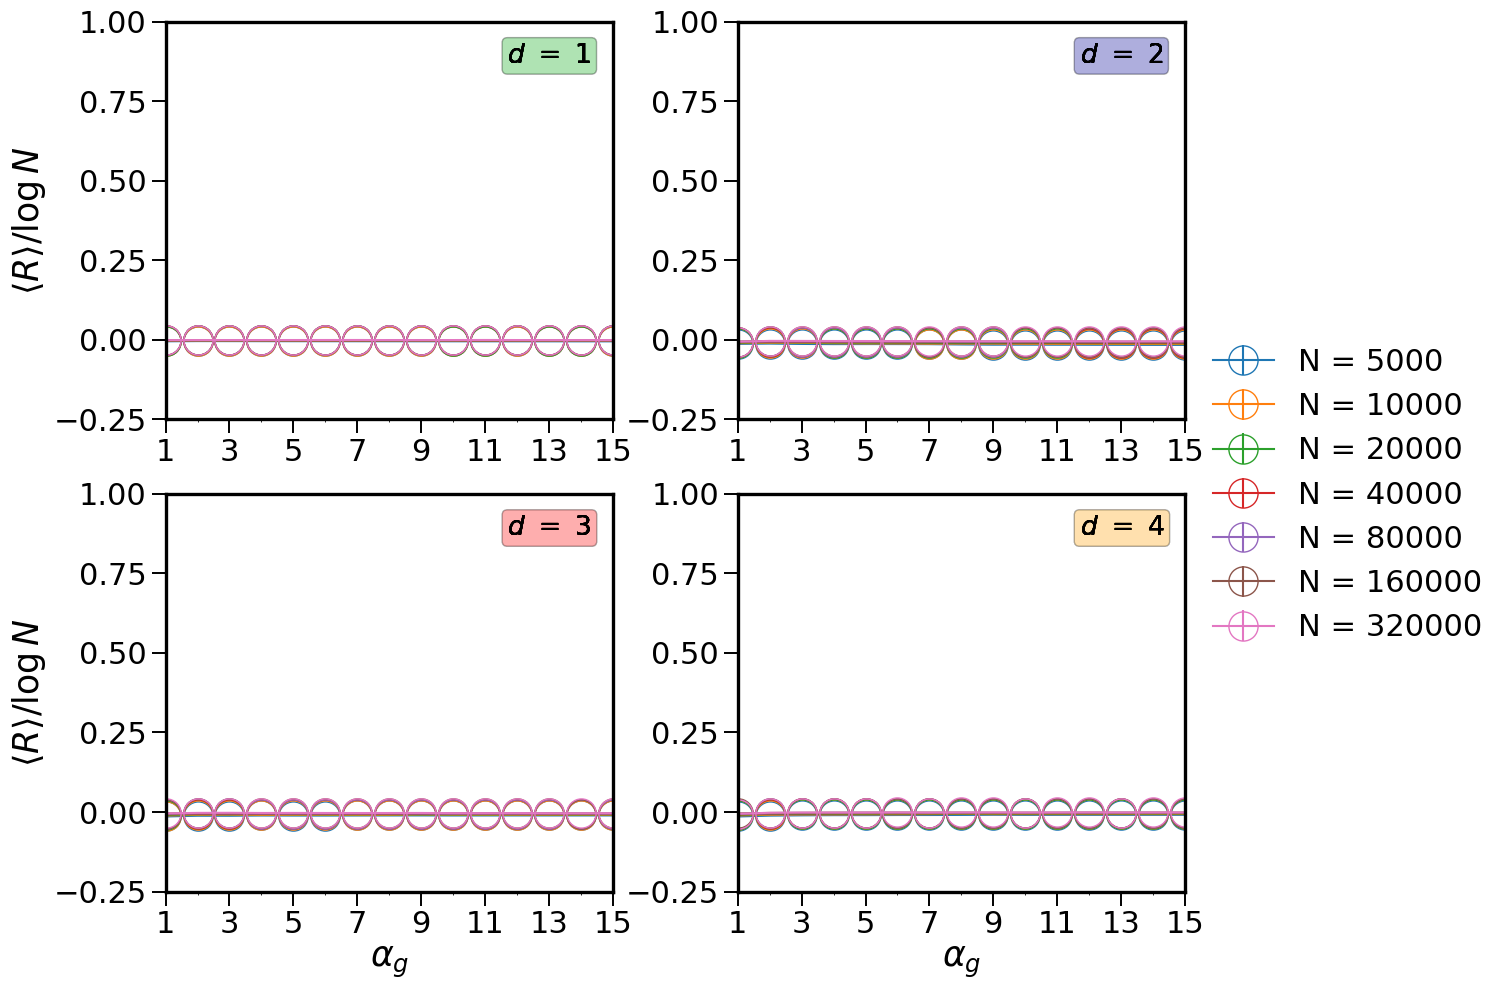

In [154]:
#R/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['ass_coeff_mean']/np.log(N[i]),
                    yerr=df_ord['ass_coeff_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.7, y=.87, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([-.25, 1.0])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle/\log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/R_logN_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

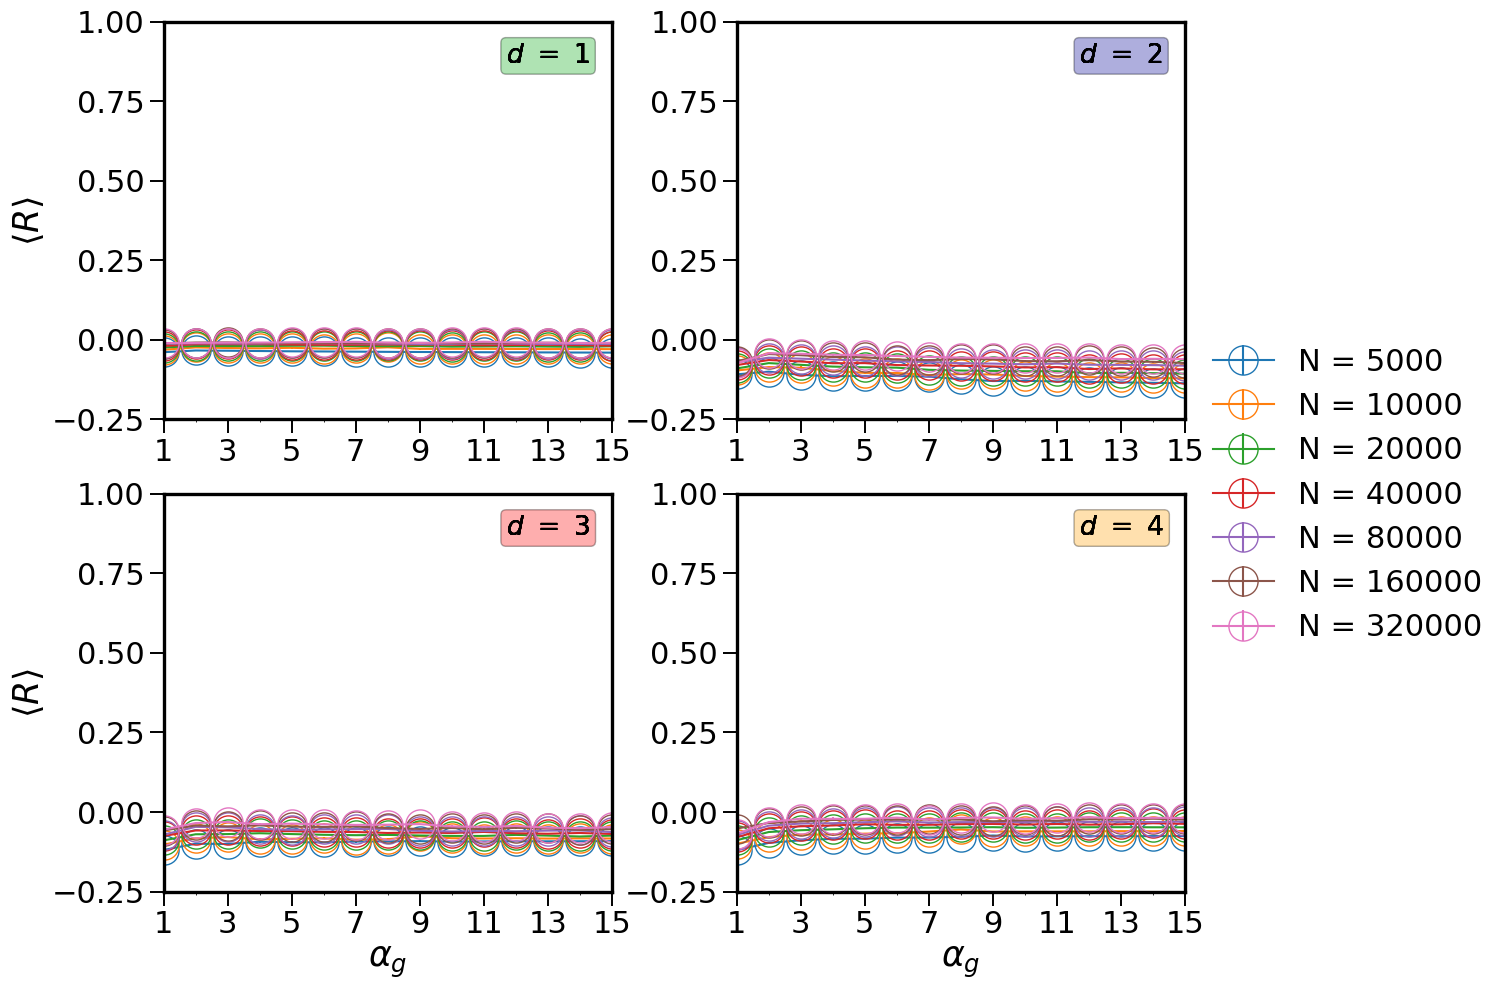

In [168]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['ass_coeff_mean'],
                    yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.7, y=.87, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([-.25, 1.0])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/R_multi_N_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

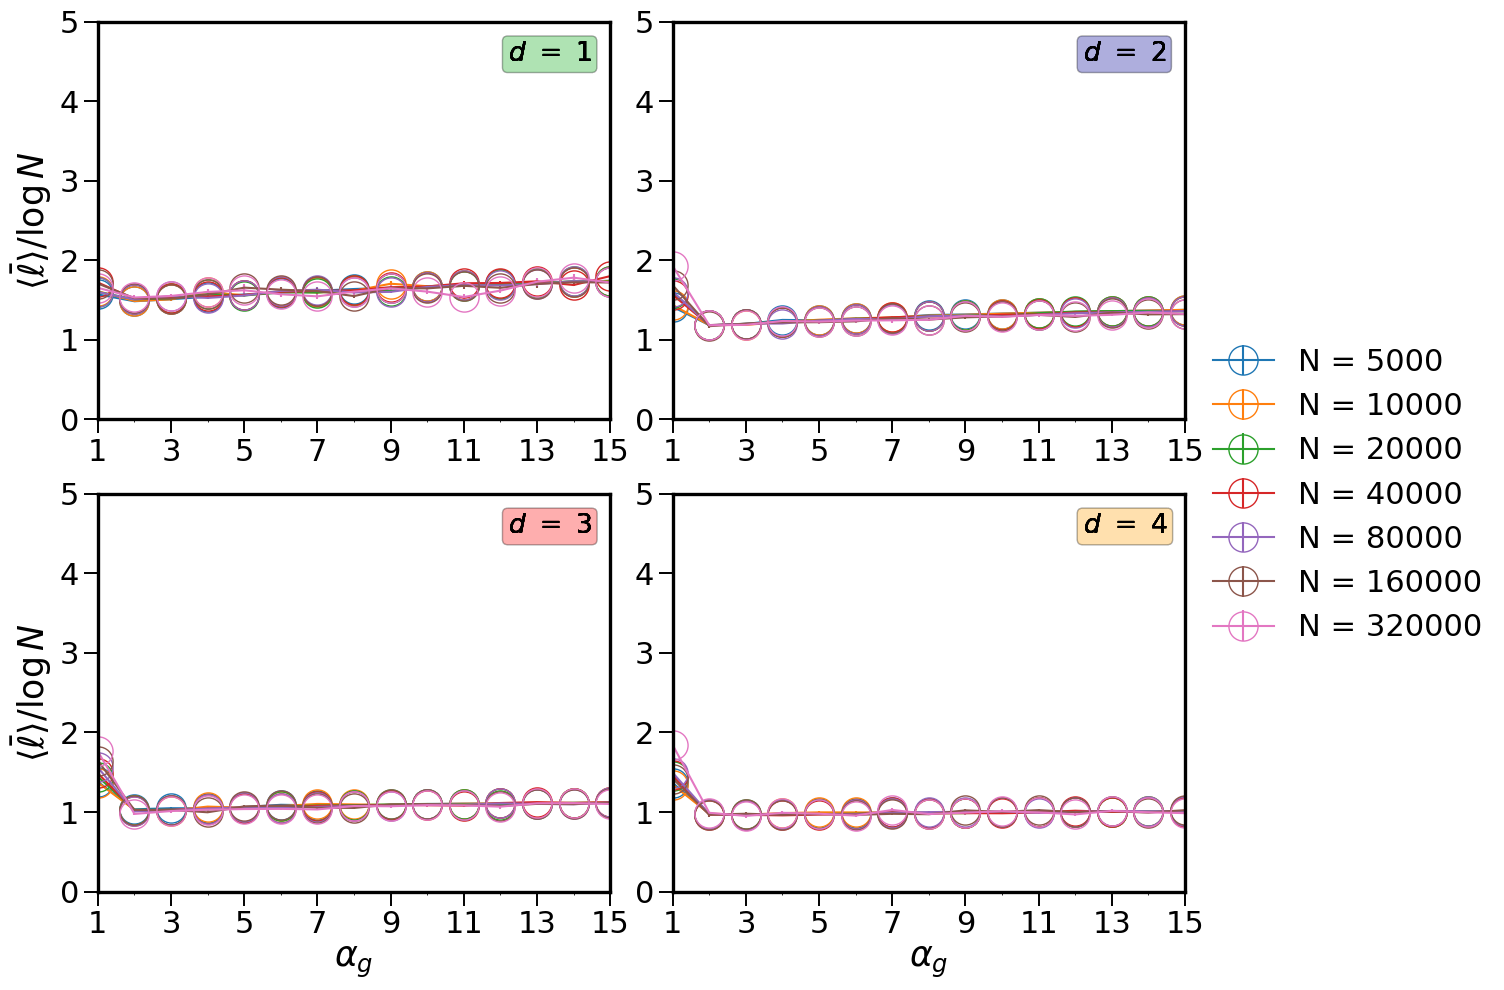

In [167]:
#SHORT/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['short_mean']/np.log(N[i]),
                    yerr=df_ord['short_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.2, y=4.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0.0, 5])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/short_logN_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

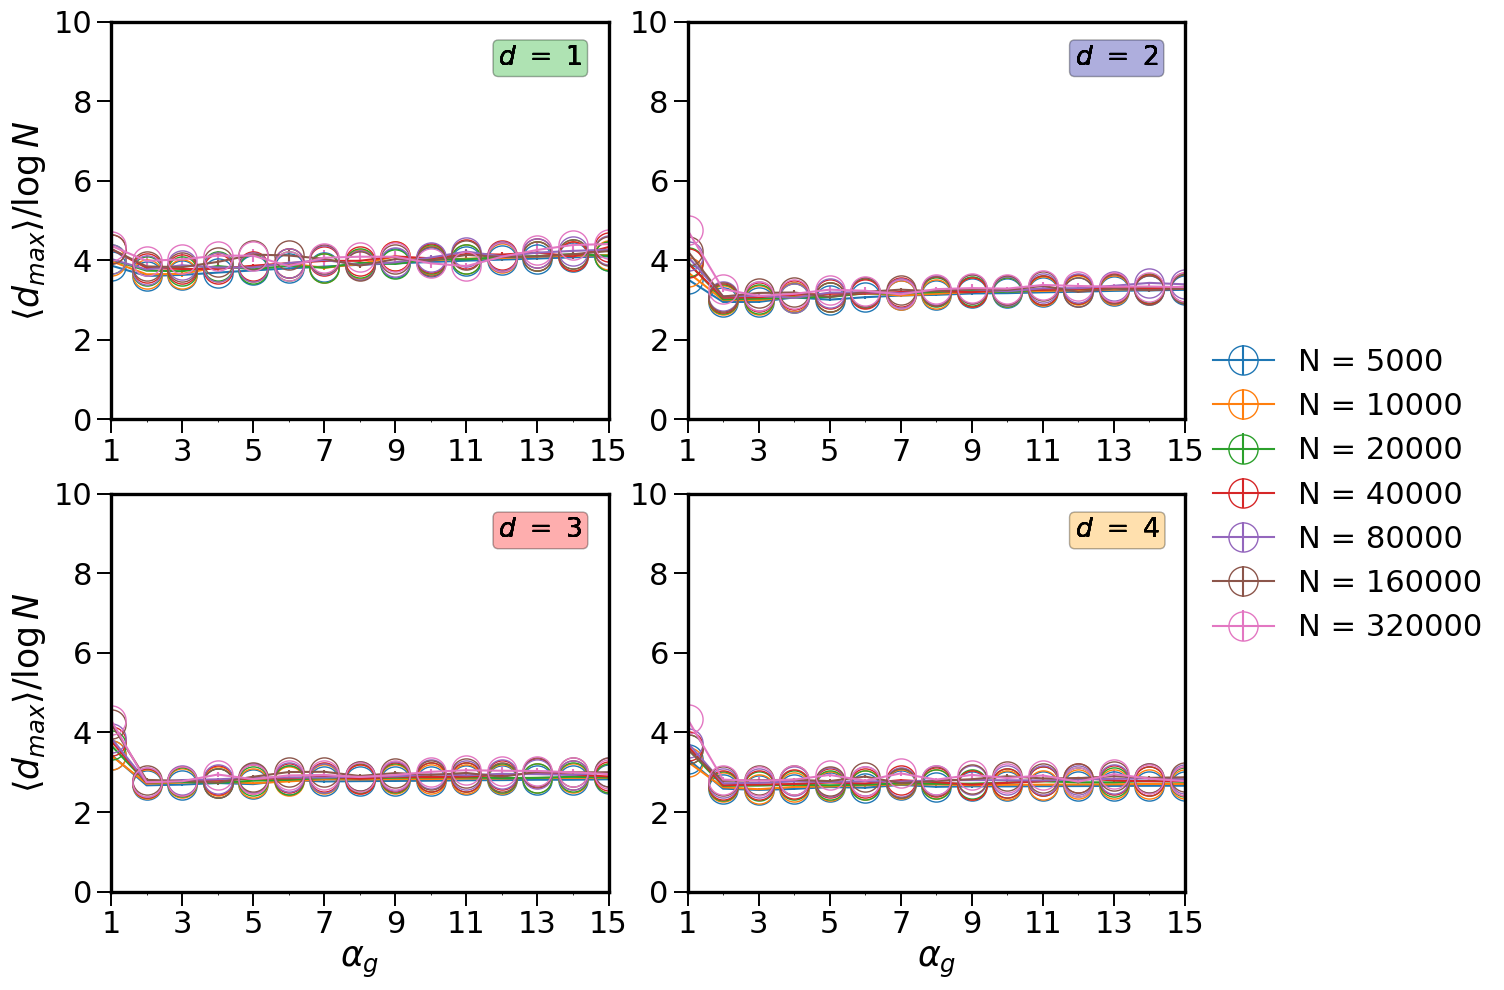

In [182]:
#DIAMETER/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['diameter_mean']/np.log(N[i]),
                    yerr=df_ord['diameter_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.9, y=8.9, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0, 10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/diameter_logN_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

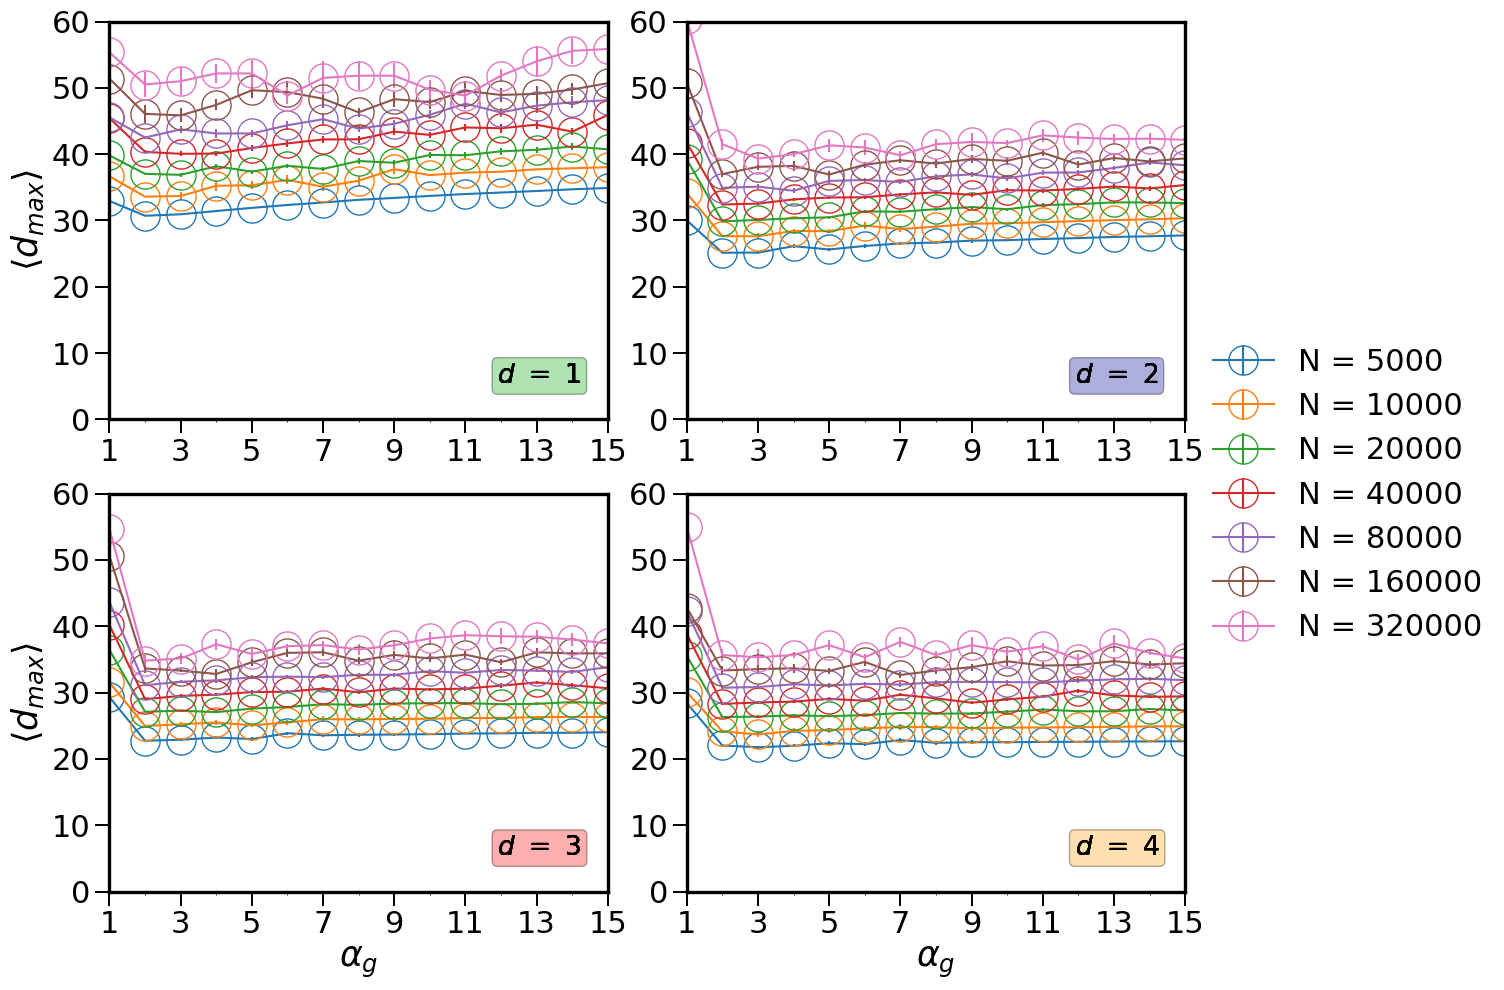

In [6]:
#DIAMETER VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['diameter_mean'],
                    yerr=df_ord['diameter_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.9, y=5.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0, 60])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/diameter_multi_N_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_A$ FOR MULTIPLIES $N$

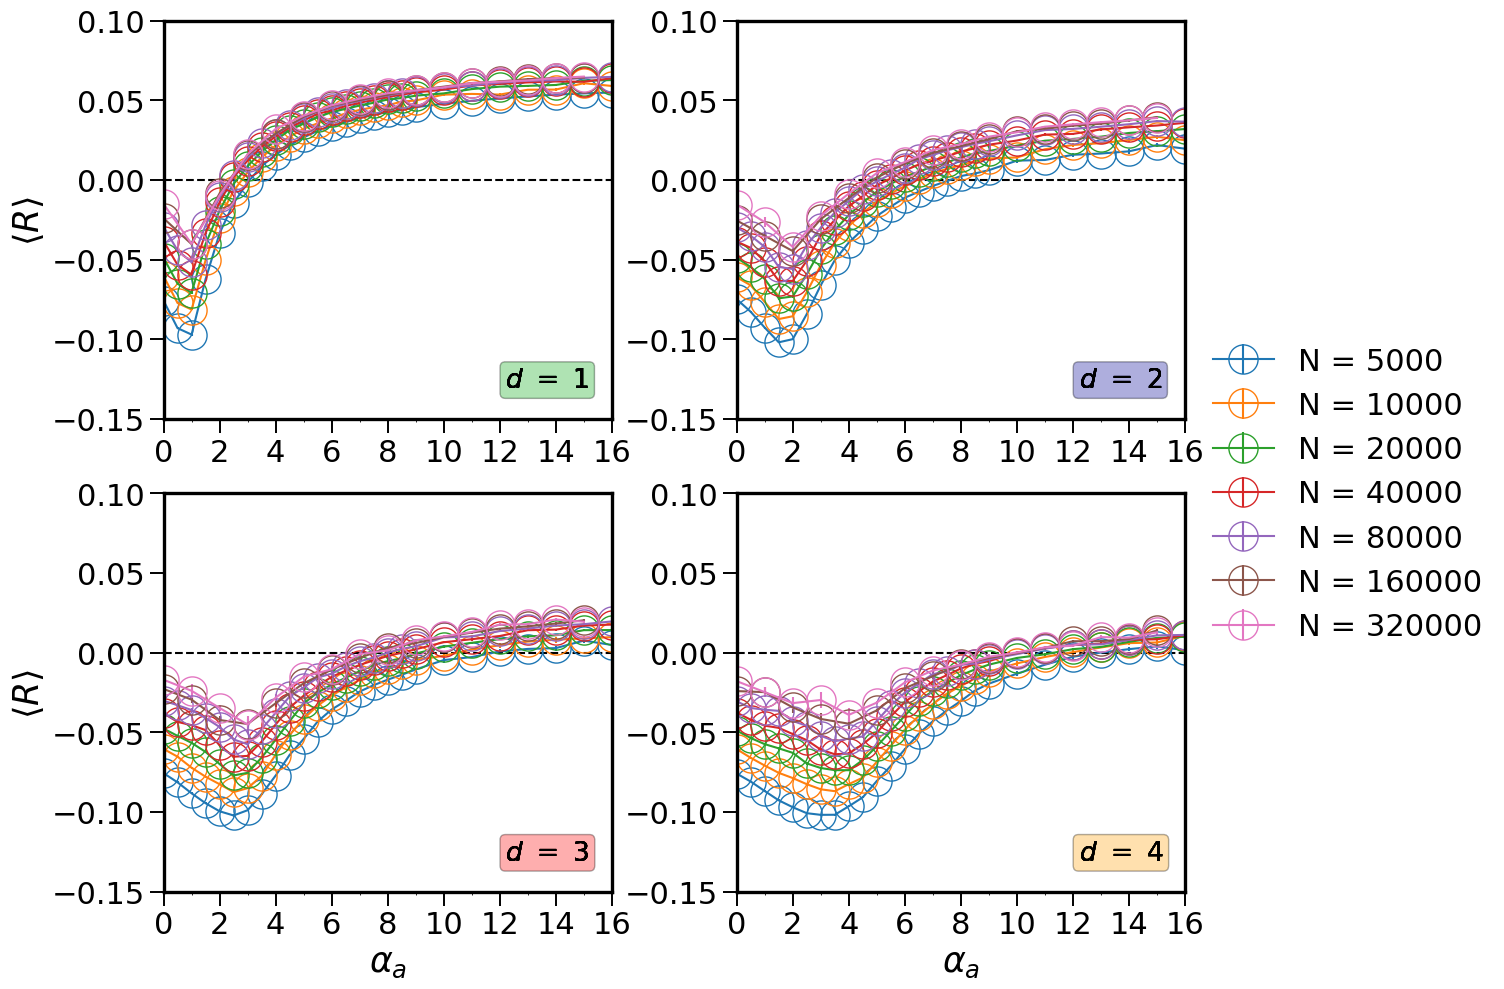

In [207]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
                    yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.2, y=-.13, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([-.15, .10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/R_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

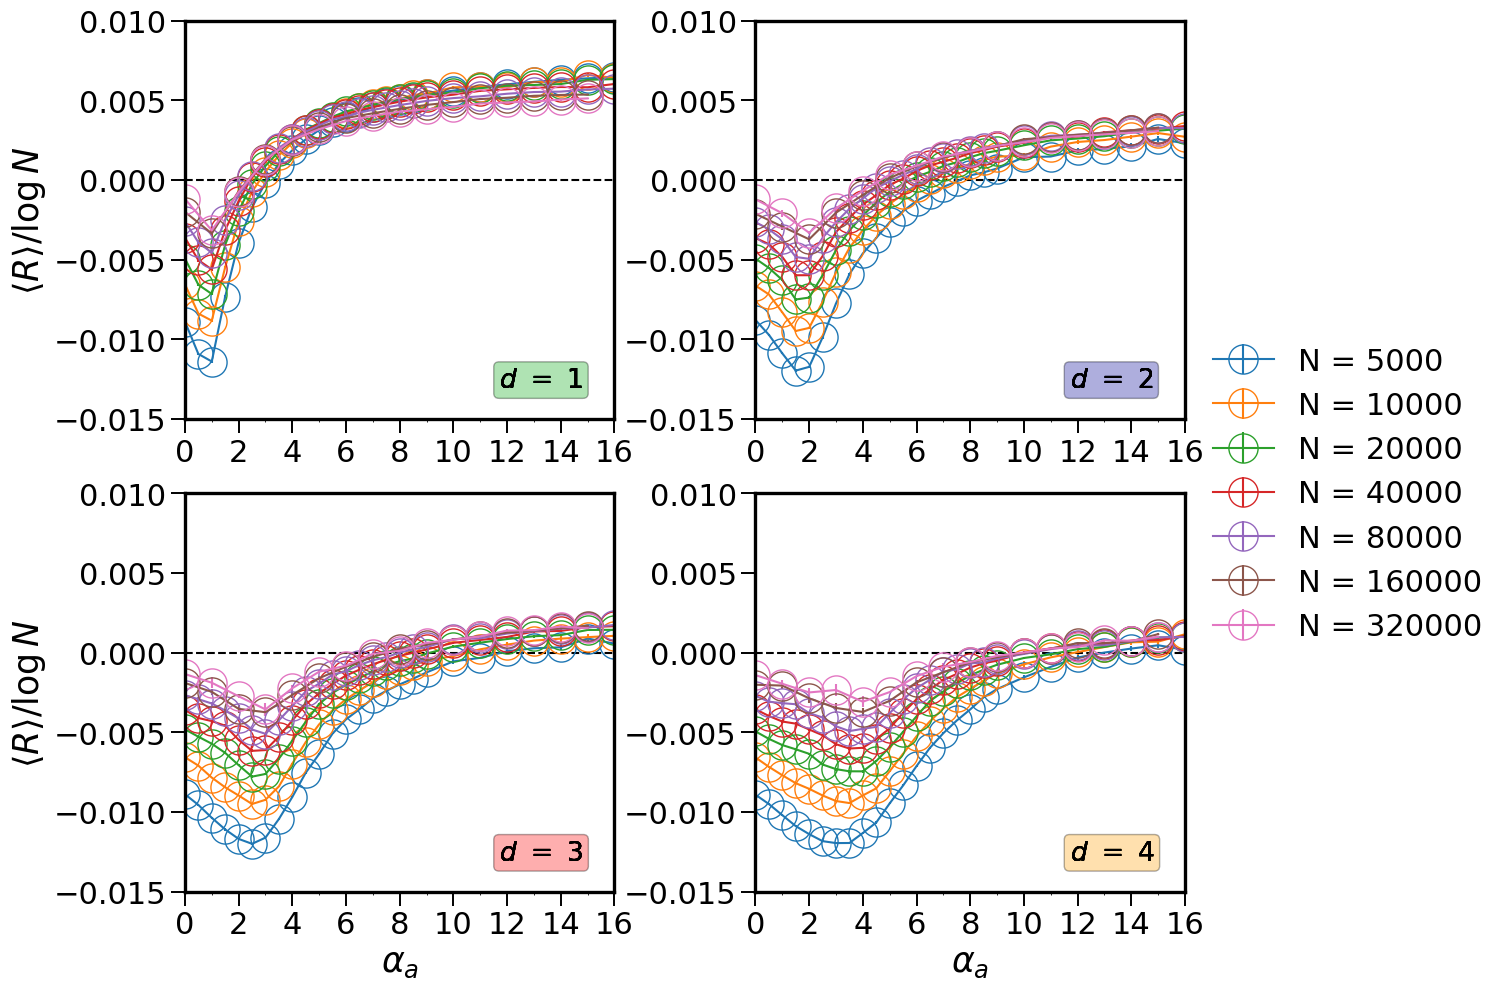

In [228]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean']/np.log(N[i]),
                    yerr=df_ord['ass_coeff_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.7, y=-.013, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([-.015, .010])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/R_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

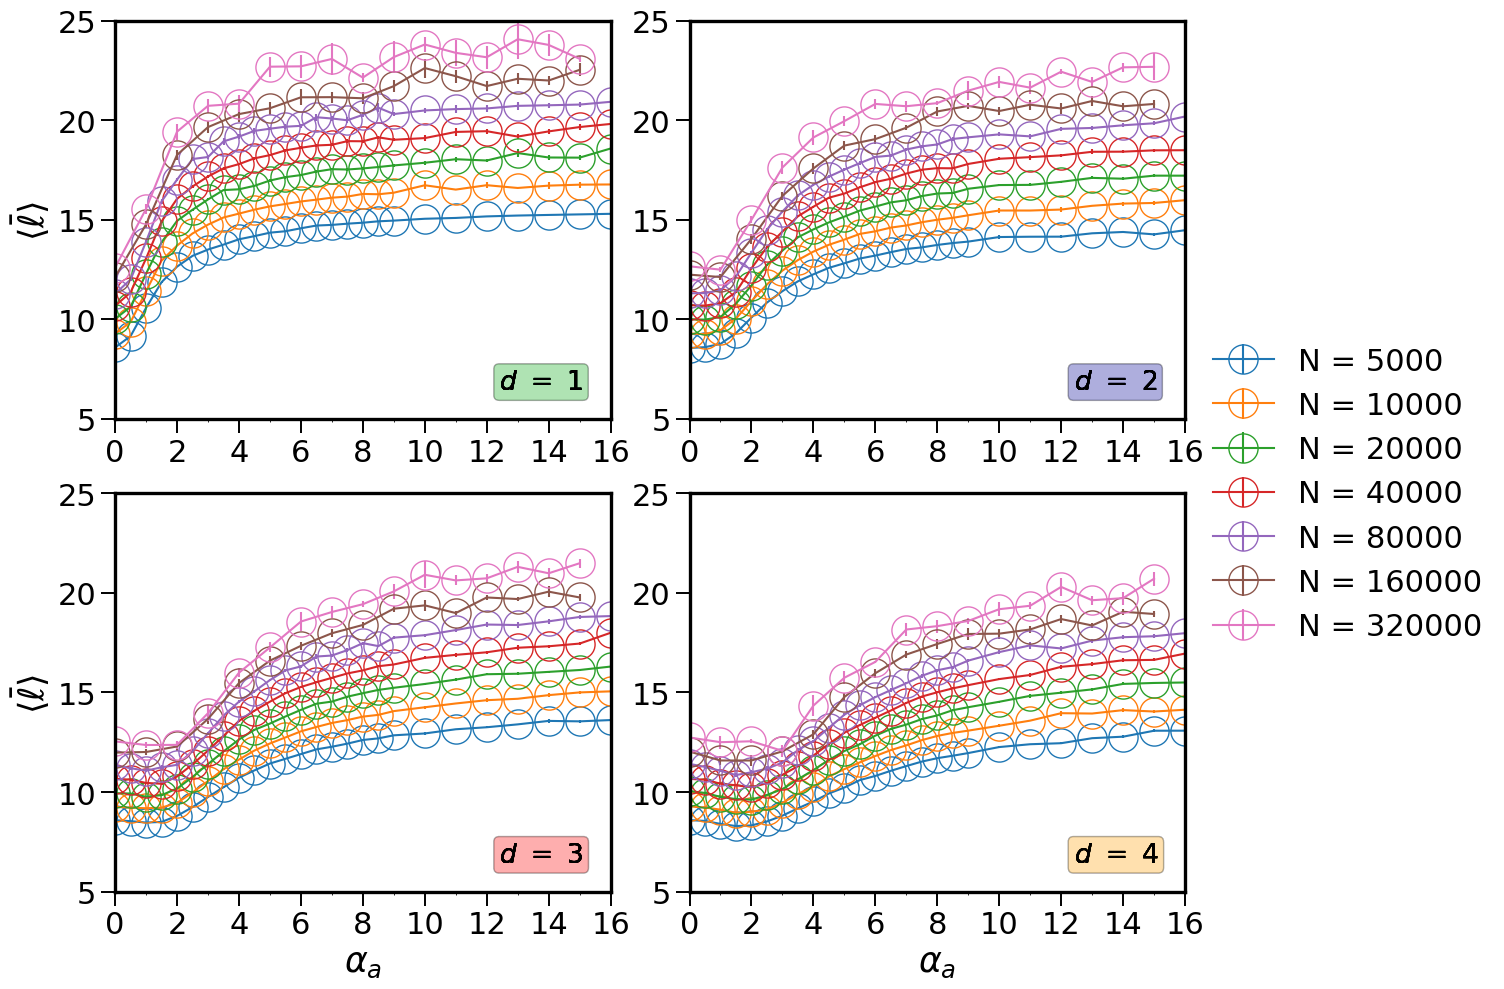

In [229]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['short_mean'],
                    yerr=df_ord['short_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.4, y=6.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([5, 25])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/short_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

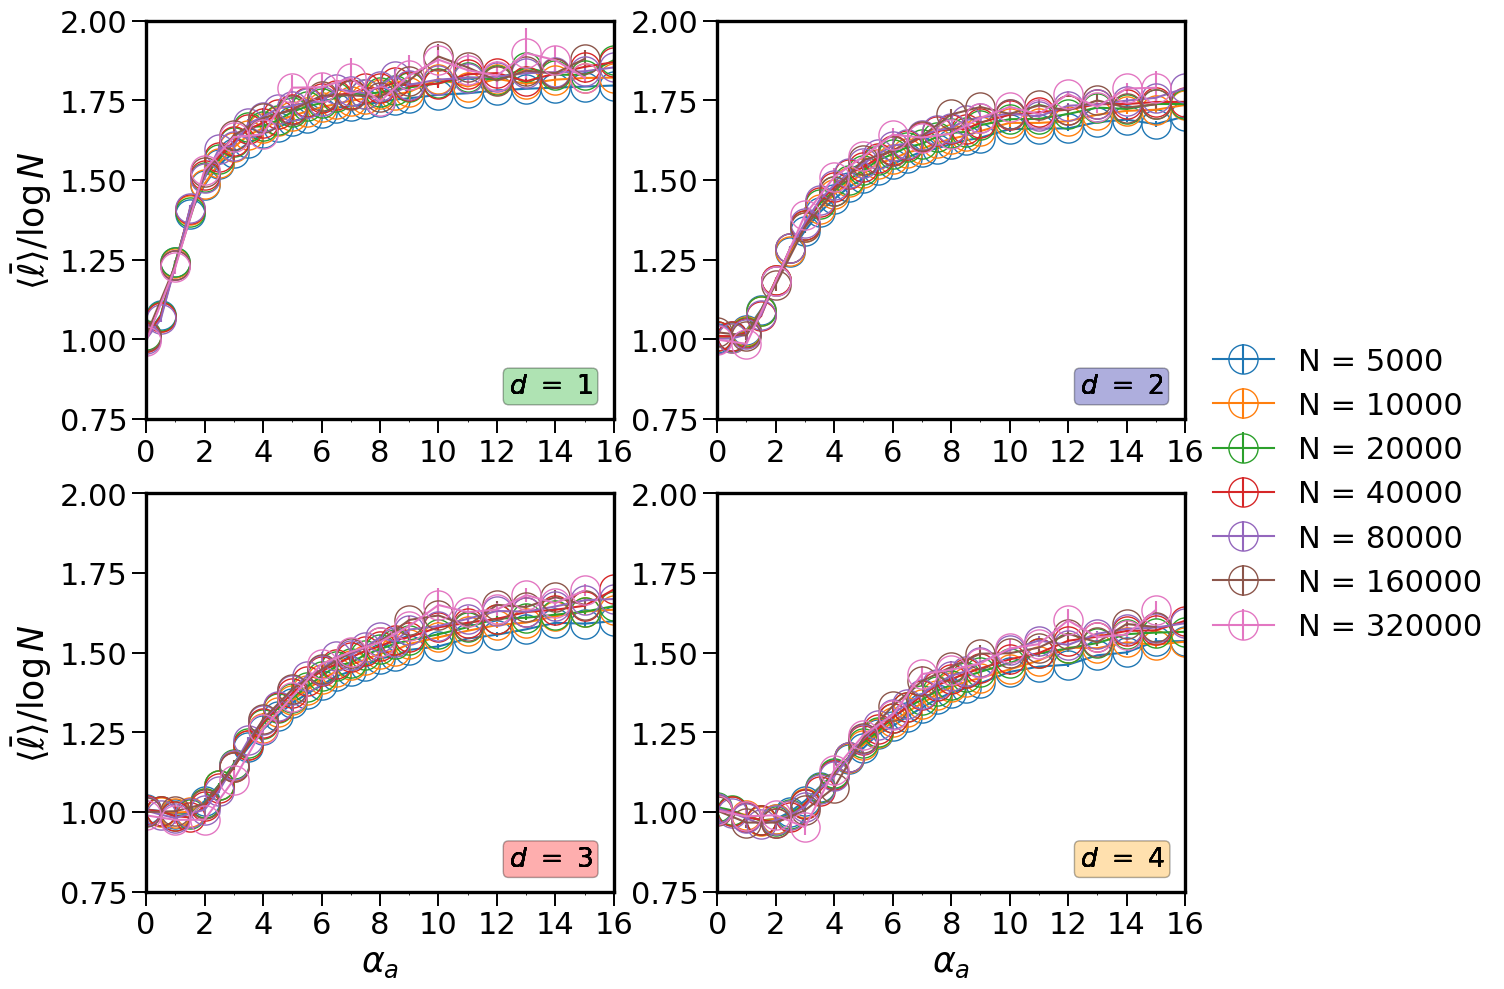

In [244]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['short_mean']/np.log(N[i]),
                    yerr=df_ord['short_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.4, y=0.83, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([0.75, 2])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao 9lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/short_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

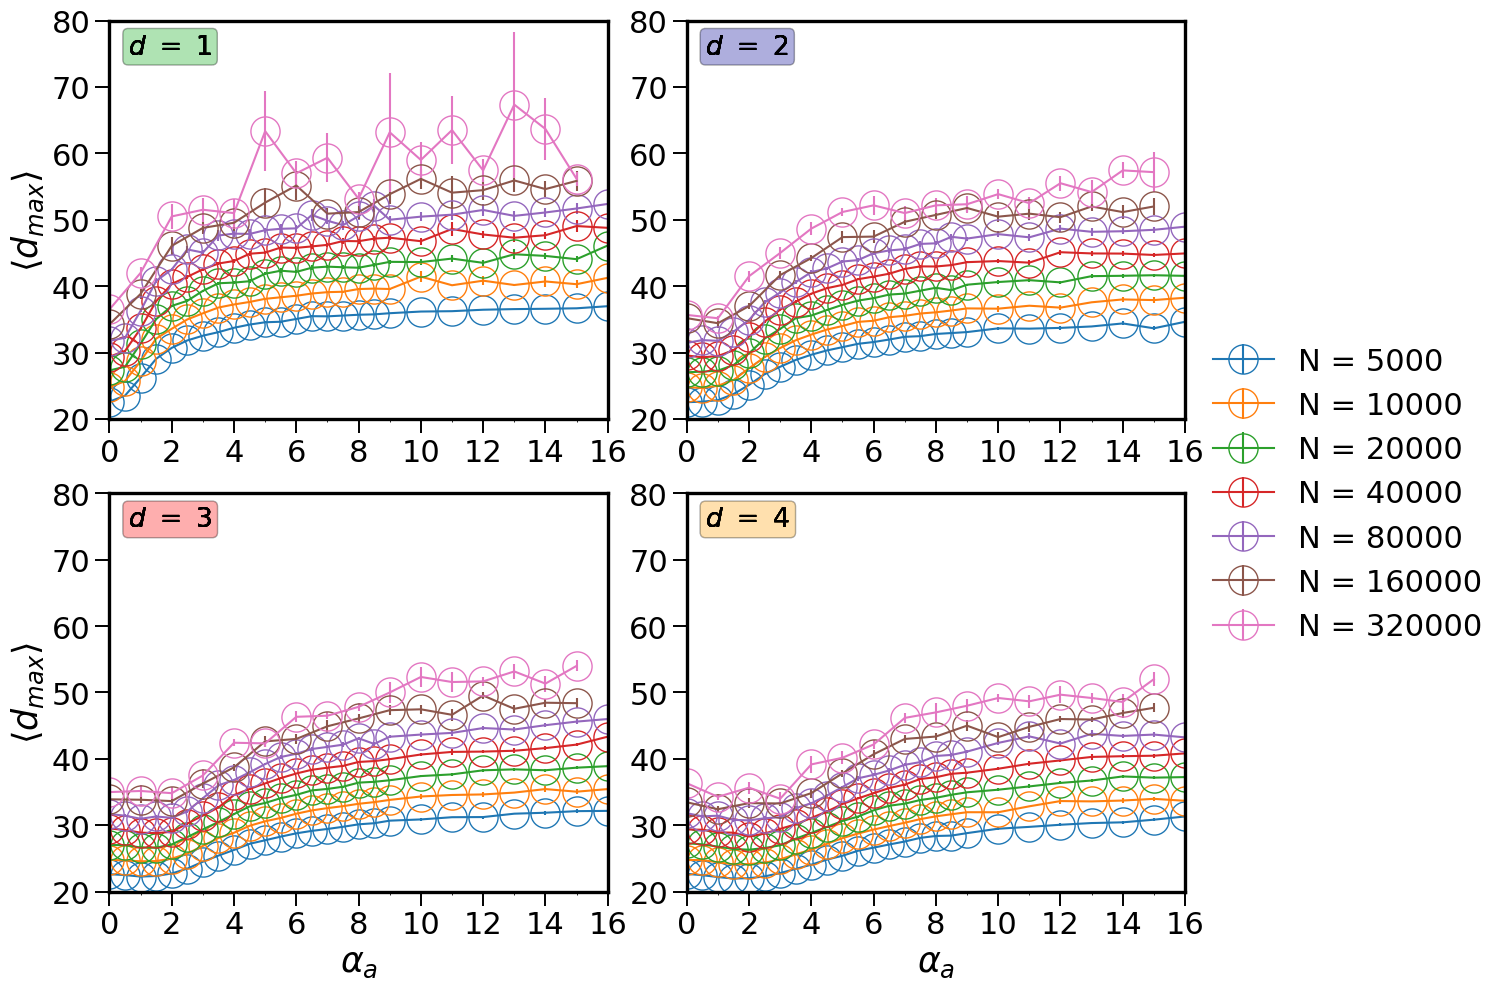

In [251]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['diameter_mean'],
                    yerr=df_ord['diameter_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=.6, y=75, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([20, 80])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/diameter_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

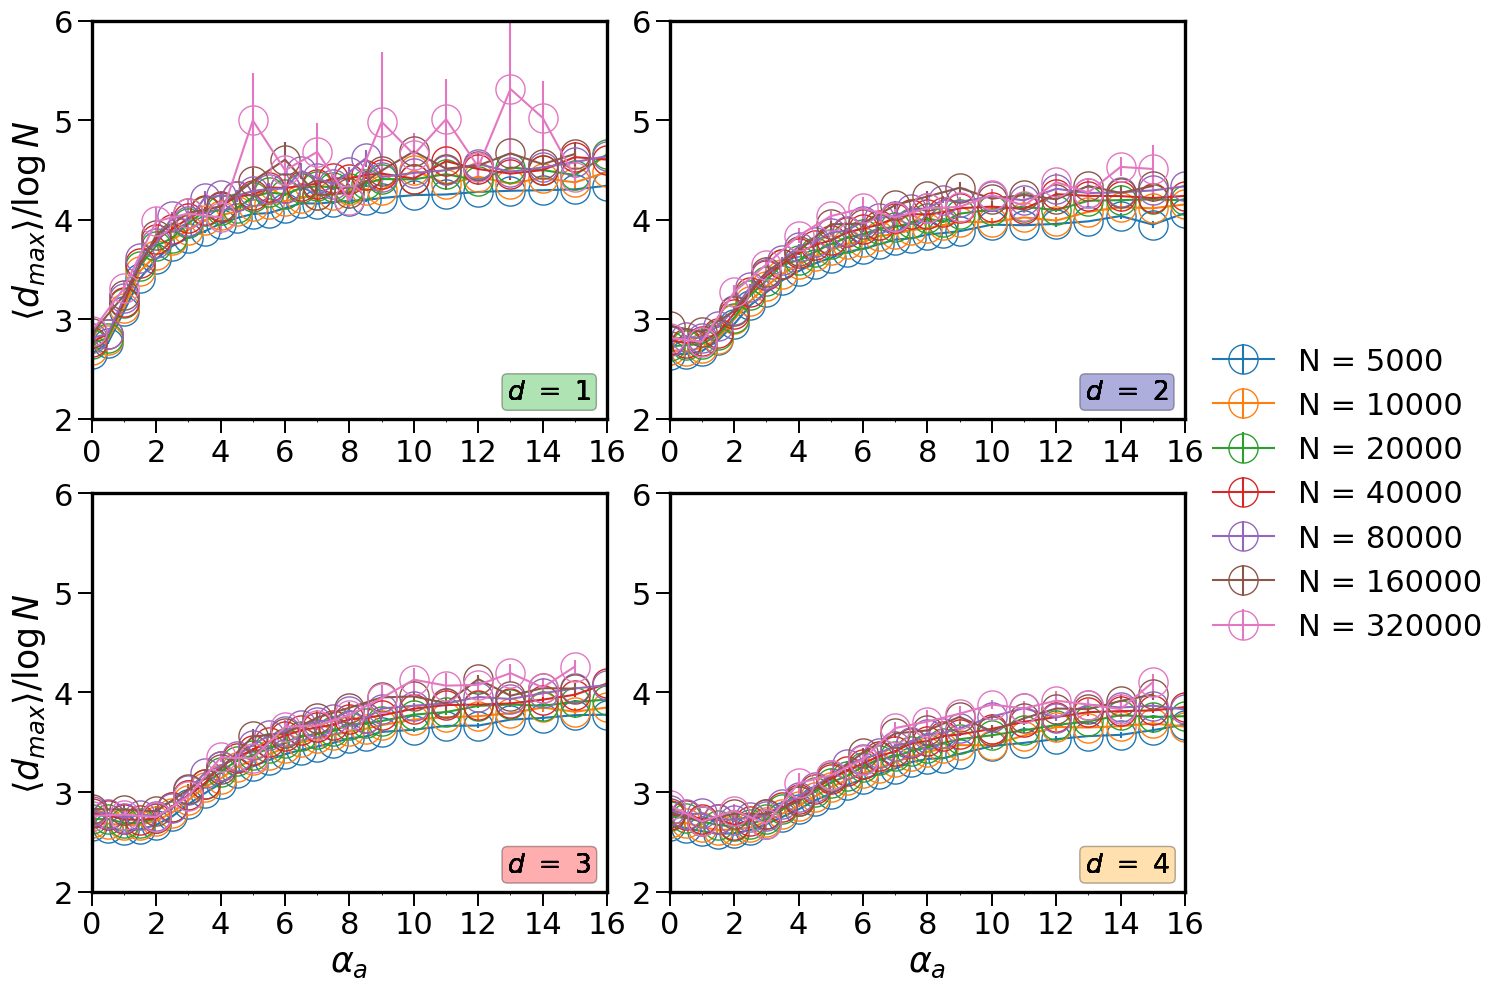

In [7]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['diameter_mean']/np.log(N[i]),
                    yerr=df_ord['diameter_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.9, y=2.2, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([2, 6.0])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle/\log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/diameter_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

## CALCULATE THE PROPERTIES LINEAR REGRESSION

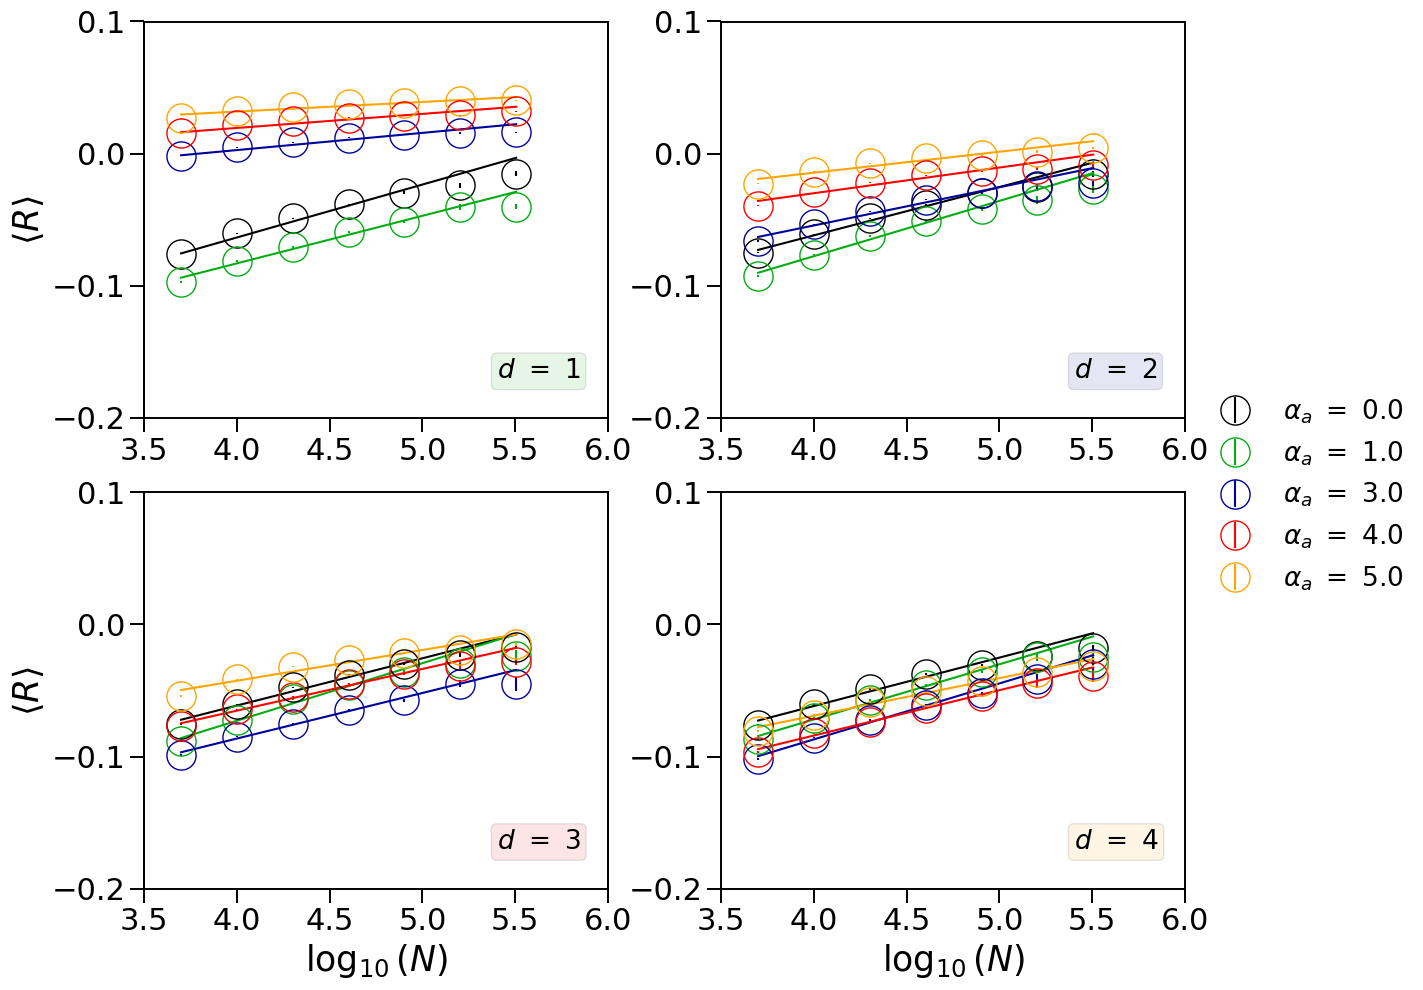

In [ ]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                N_aux.append(n)
                prop.append(df_dim_alpha_a["ass_coeff_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["ass_coeff_err"].tolist()[0])
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        #print(type(np.log(N_aux)))
        # Plota o gráfico para o valor atual de alpha_a
        ax.errorbar(np.log10(N_aux), prop, yerr=prop_err, linestyle='None', marker='o',
                    label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
        count += 1
    
    ax.text(x=5.4, y=-.17, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([3.5, 6])
    ax.set_ylim([-0.2, 0.10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/R_linear_N.pdf", dpi=300)
plt.show()

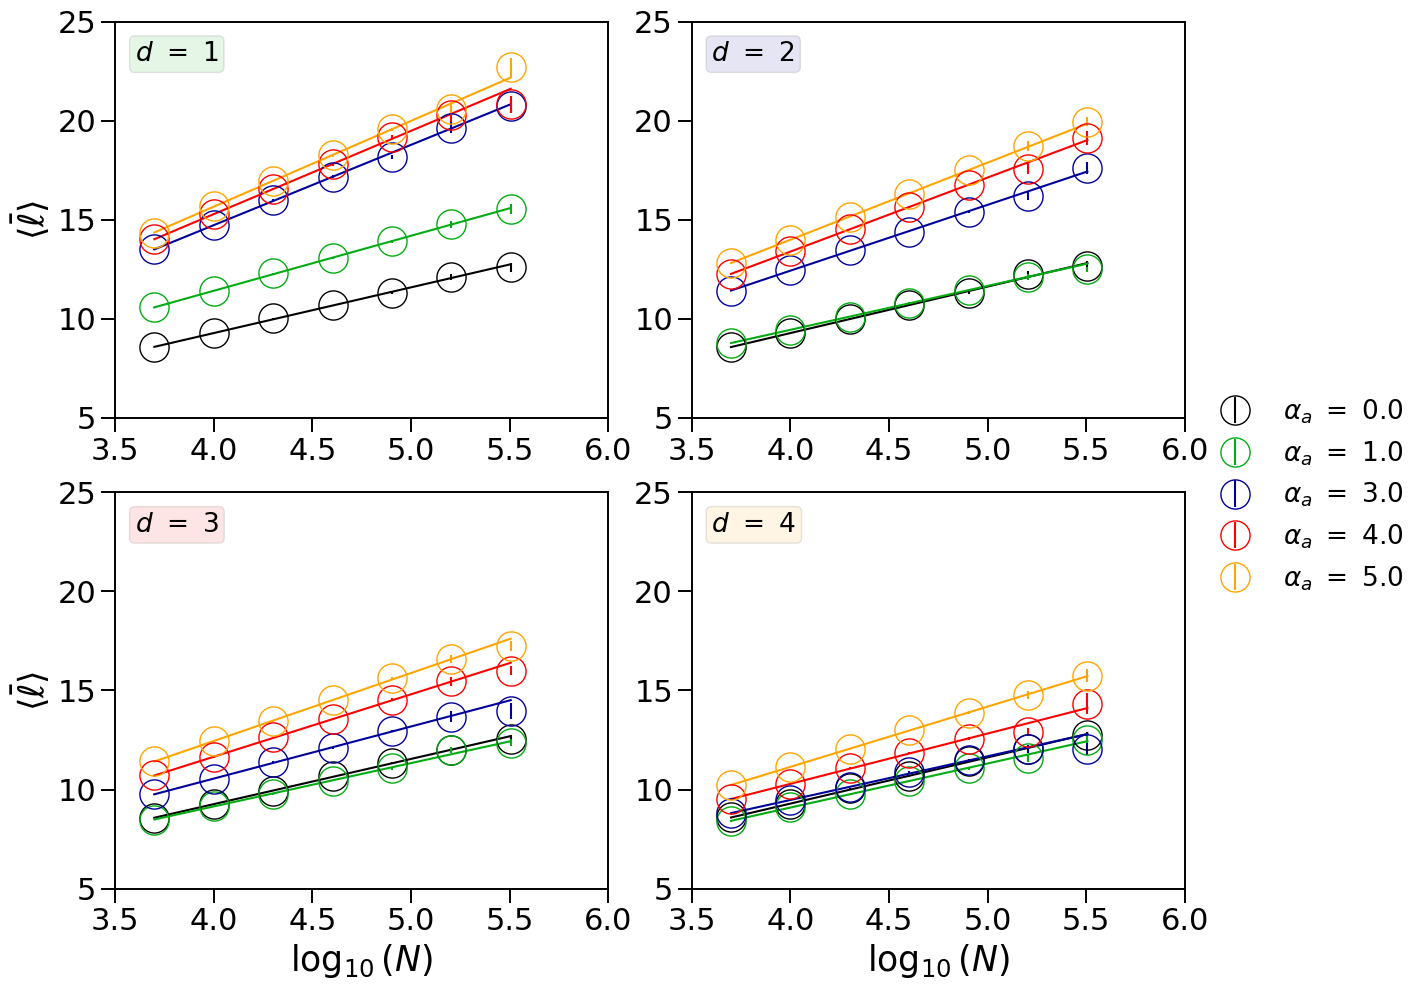

In [108]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                N_aux.append(n)
                prop.append(df_dim_alpha_a["short_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["short_err"].tolist()[0])
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        #print(type(np.log(N_aux)))
        # Plota o gráfico para o valor atual de alpha_a
        ax.errorbar(np.log10(N_aux), prop, yerr=prop_err, linestyle='None', marker='o',
                    label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
        count += 1
    
    ax.text(x=3.6, y=23, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([3.5, 6])

    ax.set_ylim([5, 25])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/short_linear_N.pdf", dpi=300)
plt.show()

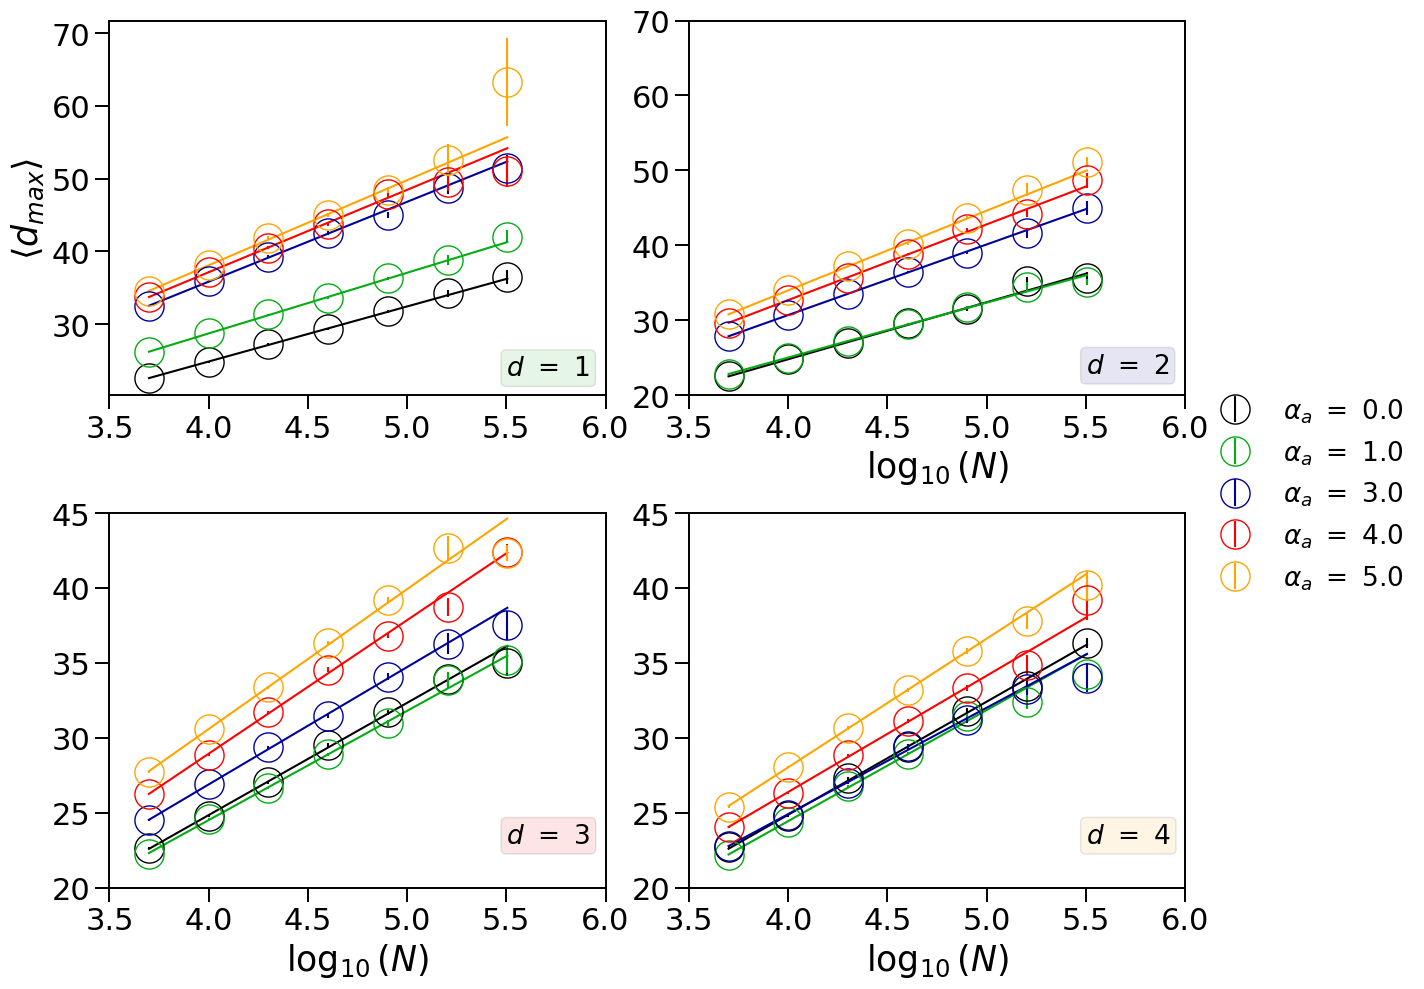

In [106]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                N_aux.append(n)
                prop.append(df_dim_alpha_a["diameter_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["diameter_err"].tolist()[0])
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        #print(type(np.log(N_aux)))
        # Plota o gráfico para o valor atual de alpha_a
        ax.errorbar(np.log10(N_aux), prop, yerr=prop_err, linestyle='None', marker='o',
                    label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
        count += 1
    
    ax.text(x=5.5, y=23, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([3.5, 6])

    #ax.set_ylim([20, 70])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
        ax.set_ylim([20, 45])

    elif dim_idx in [1, 2]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
        ax.set_ylim([20, 70])
    
    elif dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/diameter_linear_N.pdf", dpi=300)
plt.show()

## CALCULATE LINEAR COEFFICIENT VERSUS $\alpha_a$

In [8]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

coeff_all = {"alpha_a":[], "alpha_g":[], "dim":[], 
             "A_ass":[], "A_ass_err":[], "B_ass":[], "B_ass_err":[],
             "A_diameter":[], "A_diameter_err":[], "B_diameter":[], "B_diameter_err":[],
             "A_short":[], "A_short_err":[], "B_short":[], "B_short_err":[],}

properties = ["ass", "diameter", "short"]

# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
        
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter:
        N_aux = []
        prop = []
        prop_err = []
        
        for j in range(len(properties)):
            # Loop sobre os diferentes valores de N
            for n in N:
                # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
                df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
                df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
                
                # Adiciona os dados ao gráfico
                if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                    N_aux.append(n)
                    if(properties[j]=="ass"):
                        prop_name = "ass_coeff_mean"
                        prop_name_err = "ass_coeff_err"
                    
                    elif(properties[j]=="diameter"):
                        prop_name = "diameter_mean"
                        prop_name_err = "diameter_err"
                    
                    elif(properties[j]=="short"):
                        prop_name = "short_mean"
                        prop_name_err = "short_err"
                    
                    prop.append(df_dim_alpha_a[prop_name].tolist()[0])
                    prop_err.append(df_dim_alpha_a[prop_name_err].tolist()[0])

            regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=True)
                
            coeff_all[f"A_{properties[j]}"].append(regression[0])
            coeff_all[f"B_{properties[j]}"].append(regression[1])
            coeff_all[f"A_{properties[j]}_err"].append(regression[2])
            coeff_all[f"B_{properties[j]}_err"].append(regression[3])
            
        coeff_all["alpha_a"].append(alpha)
        coeff_all["dim"].append(dim)
        coeff_all["alpha_g"].append(2)

df_coeff = pd.DataFrame(data=coeff_all)
df_coeff.to_csv("../../data/coeff_linear.txt", sep=' ', index=False)
df_coeff.head()

alpha_a  alpha_g  dim     A_ass  A_ass_err     B_ass  B_ass_err  \
0      0.0        2    1  0.017388   0.000957 -0.223562   0.008382   
1      1.0        2    1  0.015624   0.001169 -0.226908   0.011383   
2      3.0        2    1  0.005651   0.000568 -0.049338   0.005164   
3      4.0        2    1  0.004624   0.000489 -0.023140   0.004485   
4      5.0        2    1  0.003162   0.000511  0.002724   0.005319   

   A_diameter  A_diameter_err  B_diameter  B_diameter_err   A_short  \
0    0.016935        0.092075   -0.217938        0.806543  0.014820   
1    0.015091        0.063094   -0.220087        0.614160  0.013088   
2    0.005468        0.034753   -0.047275        0.315719  0.004589   
3    0.004483        0.028046   -0.021554        0.257435  0.003729   
4    0.003095        0.014127    0.003492        0.147162  0.002689   

   A_short_err   B_short  B_short_err  
0     0.121860 -0.191701     1.067441  
1     0.076678 -0.195101     0.746370  
2     0.048615 -0.037259     0.441649  
3     0.040467 -0.013020     0.371442  
4     0.021663  0.008238     0.225659

In [9]:
dim = 1
df_dim = df_coeff[df_coeff["dim"]==dim]
df_dim
#plt.plot(df_dim["alpha_a"].unique(), df_dim)

alpha_a  alpha_g  dim     A_ass  A_ass_err     B_ass  B_ass_err  \
0       0.0        2    1  0.017388   0.000957 -0.223562   0.008382   
1       1.0        2    1  0.015624   0.001169 -0.226908   0.011383   
2       3.0        2    1  0.005651   0.000568 -0.049338   0.005164   
3       4.0        2    1  0.004624   0.000489 -0.023140   0.004485   
4       5.0        2    1  0.003162   0.000511  0.002724   0.005319   
5       6.0        2    1  0.003883   0.000472  0.001135   0.004363   
6       7.0        2    1  0.003902   0.000447  0.006067   0.004090   
7       8.0        2    1  0.003804   0.000423  0.010566   0.003867   
8       9.0        2    1  0.003325   0.000474  0.017729   0.004376   
9      10.0        2    1  0.003475   0.000323  0.018208   0.002866   
10     11.0        2    1  0.003146   0.000458  0.023126   0.004052   
11     12.0        2    1  0.003080   0.000317  0.024964   0.002883   
12     13.0        2    1  0.003209   0.000478  0.025305   0.004218   
13     14.0        2    1  0.003208   0.000249  0.026196   0.002203   
14     15.0        2    1  0.003079   0.000304  0.028143   0.002733   

    A_diameter  A_diameter_err  B_diameter  B_diameter_err   A_short  \
0     0.016935        0.092075   -0.217938        0.806543  0.014820   
1     0.015091        0.063094   -0.220087        0.614160  0.013088   
2     0.005468        0.034753   -0.047275        0.315719  0.004589   
3     0.004483        0.028046   -0.021554        0.257435  0.003729   
4     0.003095        0.014127    0.003492        0.147162  0.002689   
5     0.003789        0.022316    0.002211        0.206229  0.003231   
6     0.003806        0.024463    0.007145        0.223718  0.003226   
7     0.003707        0.024611    0.011647        0.224818  0.003132   
8     0.003247        0.020682    0.018632        0.190986  0.002778   
9     0.003393        0.029566    0.019140        0.262116  0.002894   
10    0.003071        0.029961    0.023991        0.265381  0.002617   
11    0.003012        0.020725    0.025776        0.188665  0.002584   
12    0.003134        0.032739    0.026169        0.288780  0.002672   
13    0.003134        0.029046    0.027058        0.257300  0.002680   
14    0.003010        0.023679    0.028958        0.212646  0.002585   

    A_short_err   B_short  B_short_err  
0      0.121860 -0.191701     1.067441  
1      0.076678 -0.195101     0.746370  
2      0.048615 -0.037259     0.441649  
3      0.040467 -0.013020     0.371442  
4      0.021663  0.008238     0.225659  
5      0.033446  0.008633     0.309075  
6      0.036786  0.013667     0.336403  
7      0.037024  0.018113     0.338204  
8      0.031254  0.024070     0.288611  
9      0.044774  0.024909     0.396939  
10     0.045482  0.029337     0.402858  
11     0.031488  0.030879     0.286648  
12     0.049815  0.031537     0.439399  
13     0.044214  0.032373     0.391658  
14     0.036202  0.034012     0.325102

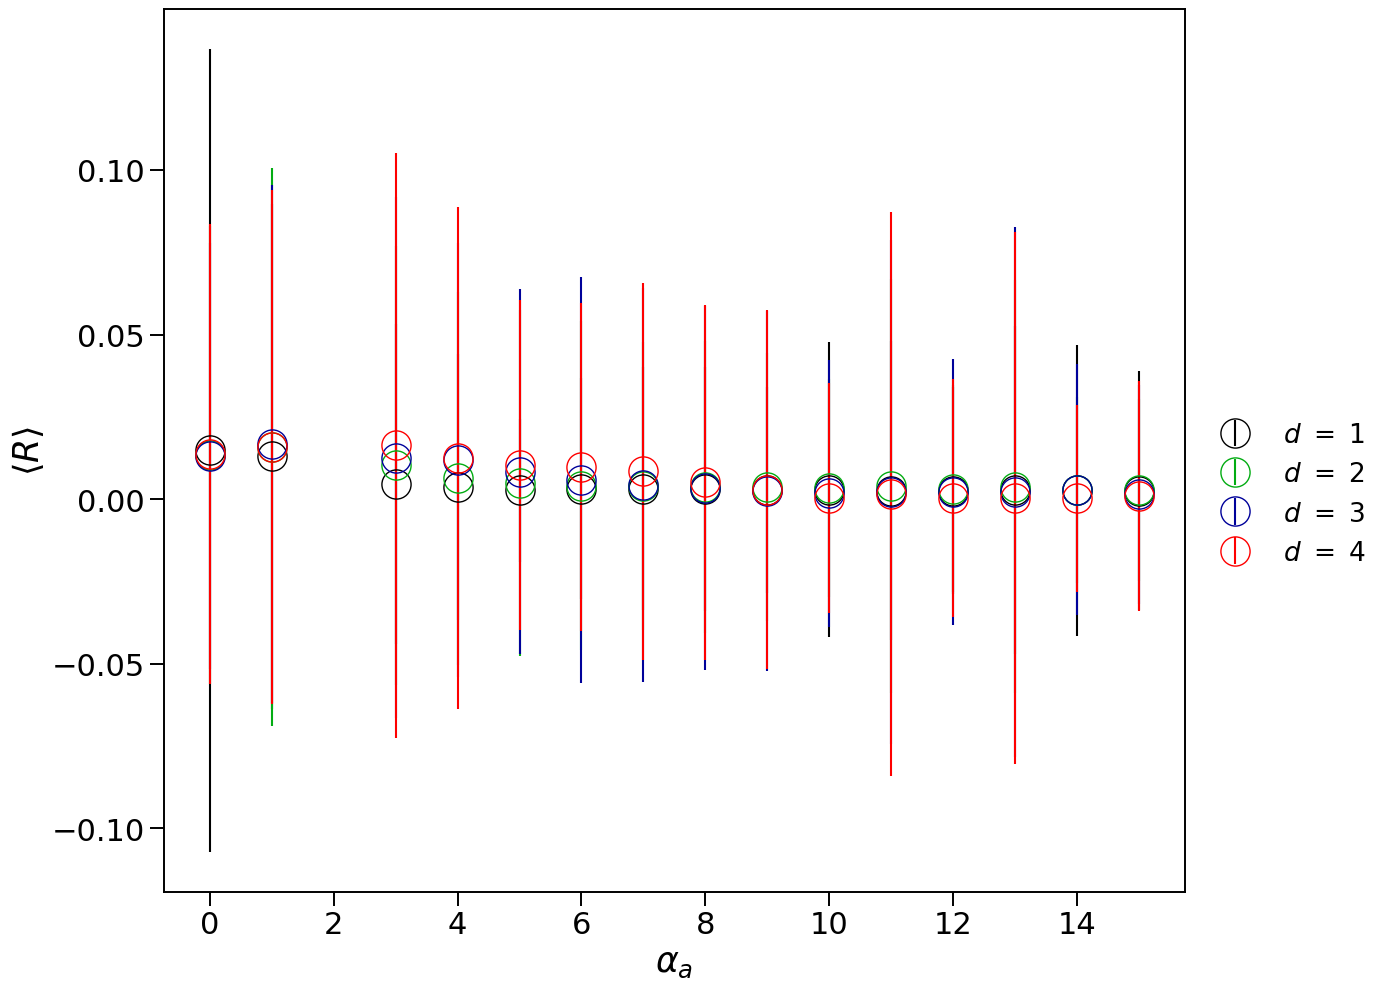

In [10]:
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
count = 0
for dim_idx, dim in enumerate(dimensions):
    df_dim = df_coeff[df_coeff["dim"]==dim]
    # Plota o gráfico para o valor atual de alpha_a
    ax.errorbar(df_dim["alpha_a"], df_dim["A_short"], yerr=df_dim["A_short_err"], linestyle='None', marker='o',
                label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
    #ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
    count += 1
    
    #ax.text(x=5.5, y=23, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
     #   color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    #ax.set_xlim([3.5, 6])
    #ax.set_ylim([20, 70])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$d$ $=$ ${dim}$" for dim in dimensions], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/N/ass_linear_coeff.pdf", dpi=300)
plt.show()

## PLOT TO UNIQUE N VALUE ($N$ $=$ $160000$) WITH $\alpha_g$ $=$ $2.0$

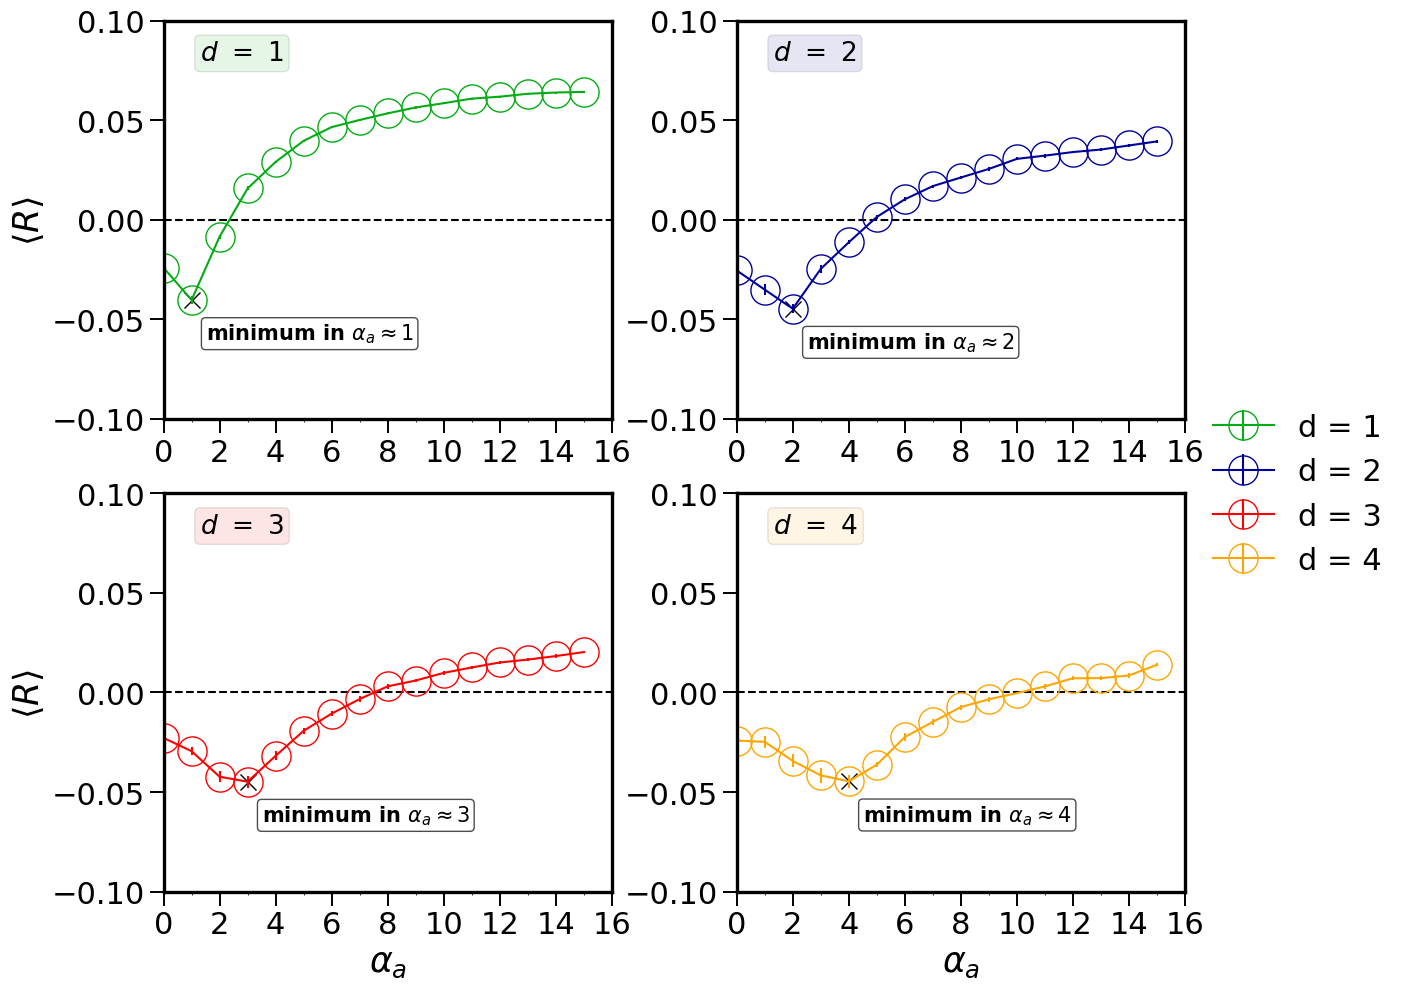

In [103]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # Calcula o mínimo
    min_row = df_ord.loc[df_ord['ass_coeff_mean'].idxmin()]
    alpha_min = min_row['alpha_a']
    value_min = min_row['ass_coeff_mean']
    
    # Adiciona marcador no ponto mínimo
    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')
    
    # Adiciona anotação para destacar o ponto
    ax.text(alpha_min + 0.5, value_min - 0.02,
            rf"minimum in $\alpha_a \approx {dim}$",
            fontsize=15, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
    
    
    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
                yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    
    #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
    ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
            color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([-.10, .10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

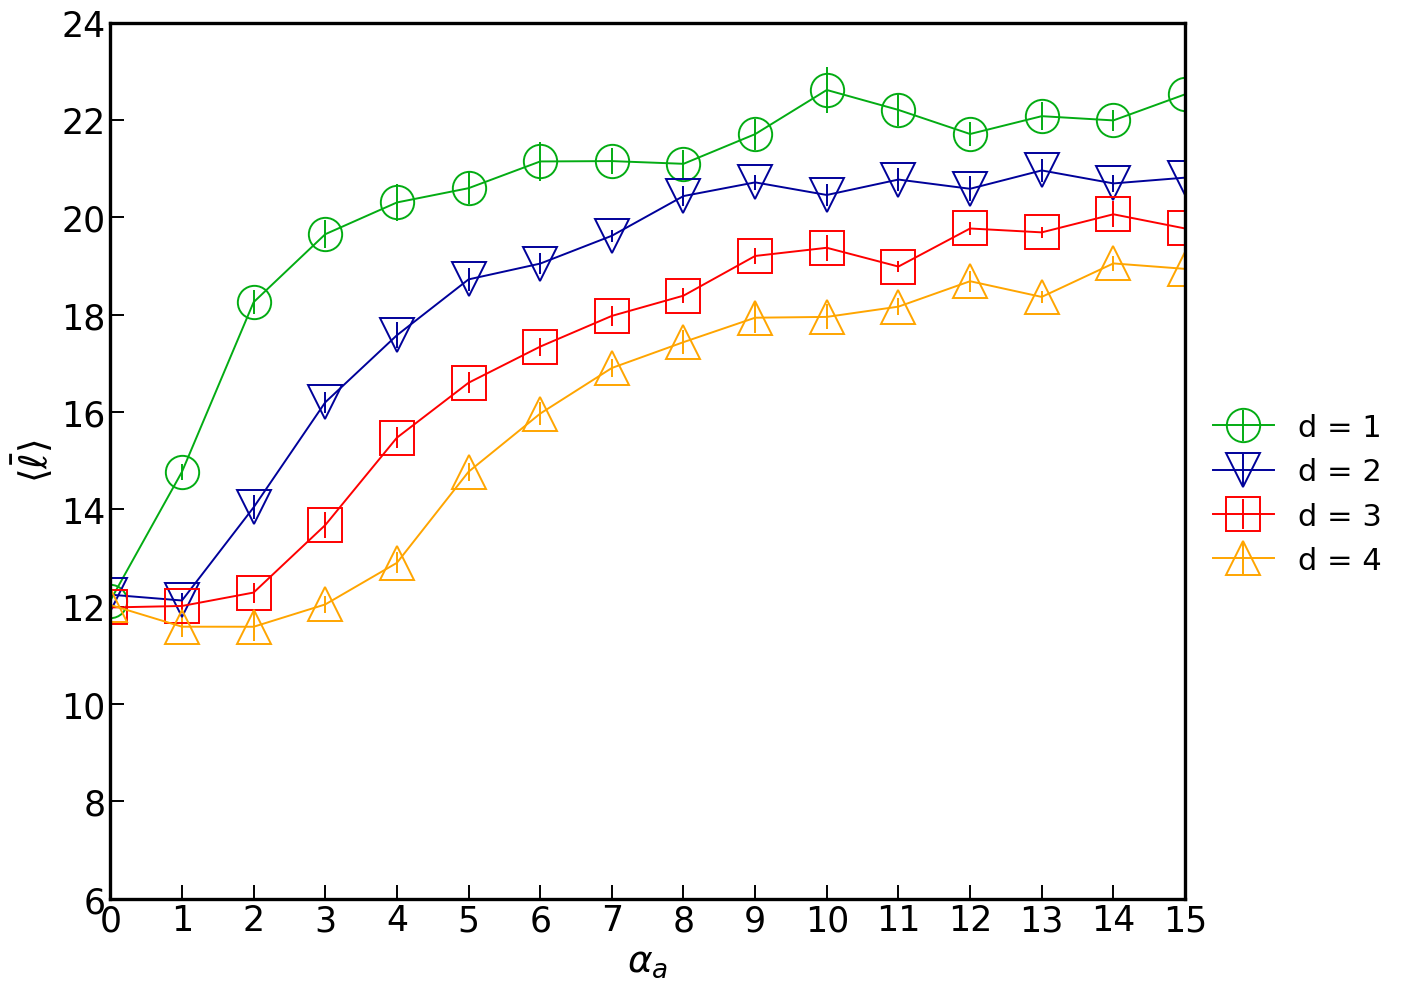

In [61]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markers = ['o', 'v', 's', '^', 'D']
markersize = 24
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim in dimensions:
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # # Calcula o mínimo
    # min_row = df_ord.loc[df_ord['short_mean'].idxmin()]
    # alpha_min = min_row['alpha_a']
    # value_min = min_row['short_mean']

    # Adiciona marcador no ponto mínimo
    #    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')

    # Adiciona anotação para destacar o ponto
    # ax.text(alpha_min + 0.5, value_min - 0.02,
    #         rf"minimum in $\alpha_a \approx {dim}$",
    #         fontsize=15, color='black', weight='bold',
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))


    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['short_mean'],
                yerr=df_ord['short_err'], linestyle='-', lw=1.4,marker=markers[j], mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    j+=1
#ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
#ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

# Define os limites e configurações do eixo x e y
ax.set_xlim([0, 15])
ax.set_ylim([6, 24])
ax.tick_params('both', width=1.4, length=10, direction='in' ,labelsize=25)
# Define os multiplicadores dos ticks no eixo x com um step de 2
ax.xaxis.set_major_locator(MultipleLocator(1))


# Condições para exibir rótulos dos eixos em subplots específicos
ax.set_xlabel(r"$\alpha_a$", size=27)

ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=27)

# Define a espessura das bordas
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/short_N_{N}_alpha_a_full.svg", dpi=300, bbox_inches="tight")
plt.show()

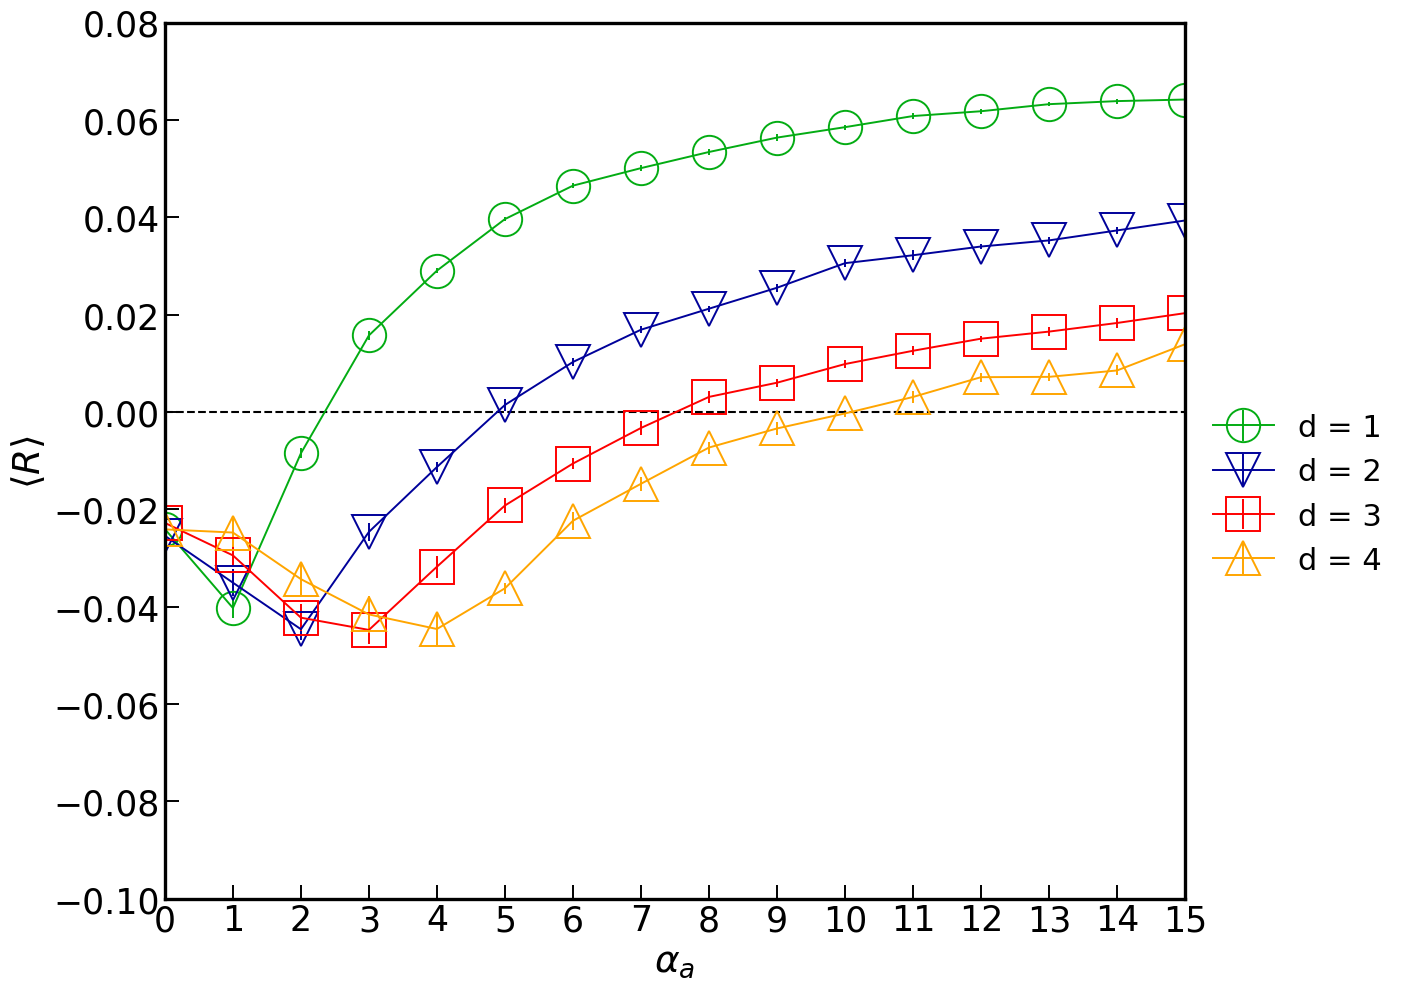

In [93]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markers = ['o', 'v', 's', '^', 'D']
markersize = 24
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim in dimensions:
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # # Calcula o mínimo
    # min_row = df_ord.loc[df_ord['short_mean'].idxmin()]
    # alpha_min = min_row['alpha_a']
    # value_min = min_row['short_mean']

    # Adiciona marcador no ponto mínimo
    #    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')

    # Adiciona anotação para destacar o ponto
    # ax.text(alpha_min + 0.5, value_min - 0.02,
    #         rf"minimum in $\alpha_a \approx {dim}$",
    #         fontsize=15, color='black', weight='bold',
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))


    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
                yerr=df_ord['ass_coeff_err'], linestyle='-', lw=1.4, marker=markers[j], mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    j+=1
ax.hlines(y=0.0, xmin=0.0, xmax=15.0, linestyle='--', color='k', label="_nolegend_")
#ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

# Define os limites e configurações do eixo x e y
ax.set_xlim([0, 15])
ax.set_ylim([-0.1, .08])
ax.tick_params('both', width=1.4, length=10, direction='in' ,labelsize=25)
# Define os multiplicadores dos ticks no eixo x com um step de 2
ax.xaxis.set_major_locator(MultipleLocator(1))


# Condições para exibir rótulos dos eixos em subplots específicos
ax.set_xlabel(r"$\alpha_a$", size=27)

ax.set_ylabel(r"$\langle R \rangle$", size=27)

# Define a espessura das bordas
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a_full.svg", dpi=300, bbox_inches="tight")
plt.show()

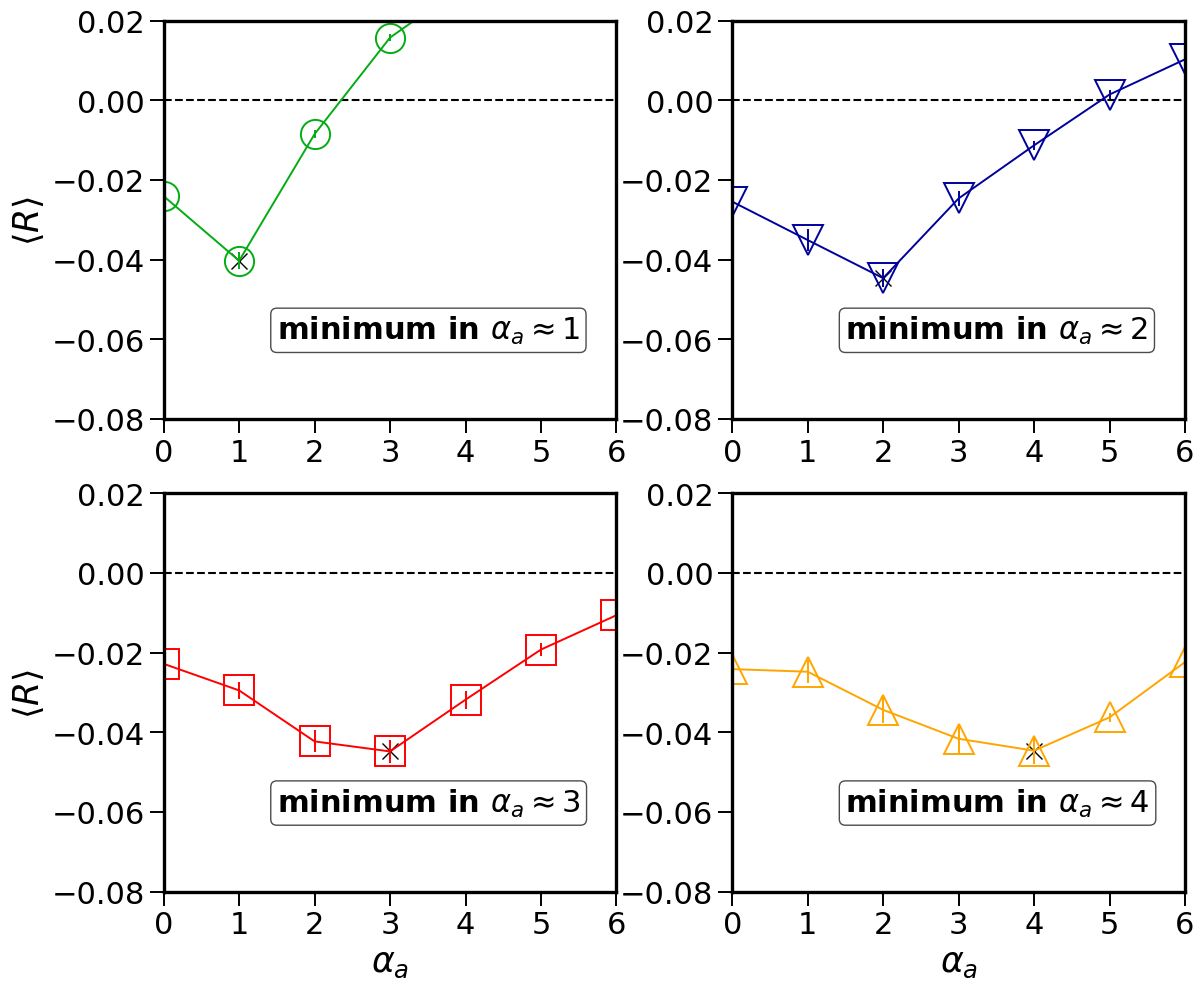

In [102]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]
markers = ['o', 'v', 's', '^', 'D']
j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # Calcula o mínimo
    min_row = df_ord.loc[df_ord['ass_coeff_mean'].idxmin()]
    alpha_min = min_row['alpha_a']
    value_min = min_row['ass_coeff_mean']
    
    # Adiciona marcador no ponto mínimo
    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')
    
    # Adiciona anotação para destacar o ponto
    ax.text(1.5, -.06,
            rf"minimum in $\alpha_a \approx {dim}$",
            fontsize=22, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
    
    
    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
                yerr=df_ord['ass_coeff_err'], linestyle='-', lw=1.4 , marker=markers[j],mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 6])
    ax.set_ylim([-.08, .02])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(1))
    #ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a_minimum_0-6.svg", dpi=300, bbox_inches="tight")
plt.show()

In [127]:
df_parms = pd.read_csv("../../data/coeff_linear.txt", sep=' ')
df_parms.head()

alpha_a  alpha_g  dim     A_ass  A_ass_err     B_ass  B_ass_err  \
0      0.0        2    1  0.017388   0.000957 -0.223562   0.008382   
1      1.0        2    1  0.015624   0.001169 -0.226908   0.011383   
2      3.0        2    1  0.005651   0.000568 -0.049338   0.005164   
3      4.0        2    1  0.004624   0.000489 -0.023140   0.004485   
4      5.0        2    1  0.003162   0.000511  0.002724   0.005319   

   A_diameter  A_diameter_err  B_diameter  B_diameter_err   A_short  \
0    0.016935        0.092075   -0.217938        0.806543  0.014820   
1    0.015091        0.063094   -0.220087        0.614160  0.013088   
2    0.005468        0.034753   -0.047275        0.315719  0.004589   
3    0.004483        0.028046   -0.021554        0.257435  0.003729   
4    0.003095        0.014127    0.003492        0.147162  0.002689   

   A_short_err   B_short  B_short_err  
0     0.121860 -0.191701     1.067441  
1     0.076678 -0.195101     0.746370  
2     0.048615 -0.037259     0.441649  
3     0.040467 -0.013020     0.371442  
4     0.021663  0.008238     0.225659

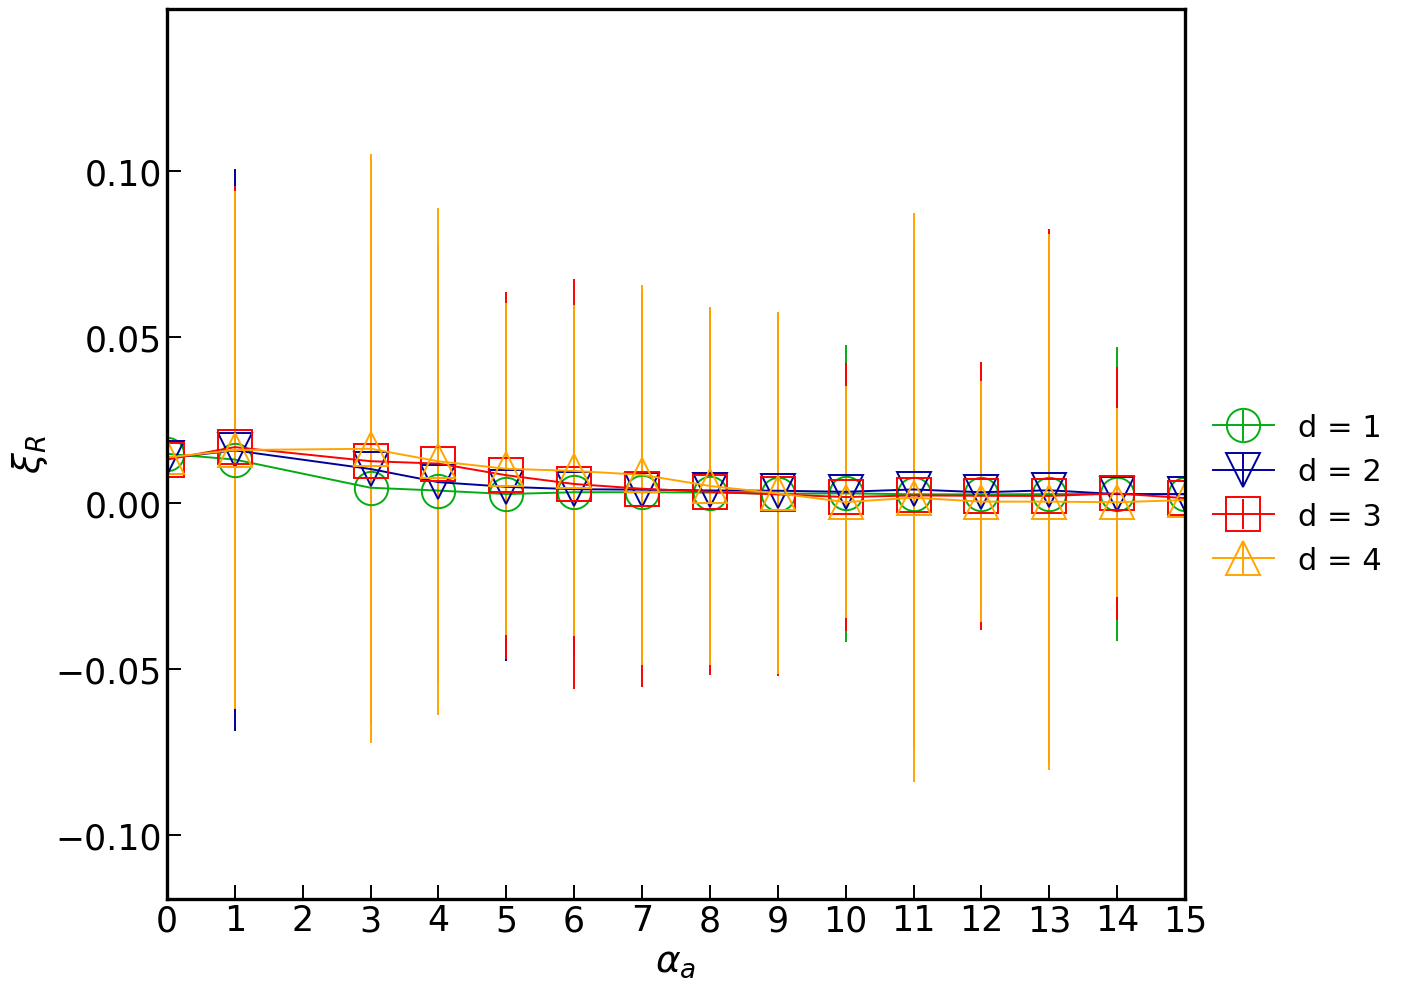

In [138]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markers = ['o', 'v', 's', '^', 'D']
markersize = 24
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim in dimensions:
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim_alpha_a = df_parms[(df_parms['dim'] == dim)]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # # Calcula o mínimo
    # min_row = df_ord.loc[df_ord['short_mean'].idxmin()]
    # alpha_min = min_row['alpha_a']
    # value_min = min_row['short_mean']

    # Adiciona marcador no ponto mínimo
    #    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')

    # Adiciona anotação para destacar o ponto
    # ax.text(alpha_min + 0.5, value_min - 0.02,
    #         rf"minimum in $\alpha_a \approx {dim}$",
    #         fontsize=15, color='black', weight='bold',
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))


    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['A_short'],
                yerr=df_ord['A_short_err'], linestyle='-', lw=1.4, marker=markers[j], mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    j+=1
#ax.hlines(y=0.0, xmin=0.0, xmax=15.0, linestyle='--', color='k', label="_nolegend_")
#ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

# Define os limites e configurações do eixo x e y
ax.set_xlim([0, 15])
#ax.set_ylim([-0.1, .08])
ax.tick_params('both', width=1.4, length=10, direction='in' ,labelsize=25)
# Define os multiplicadores dos ticks no eixo x com um step de 2
ax.xaxis.set_major_locator(MultipleLocator(1))


# Condições para exibir rótulos dos eixos em subplots específicos
ax.set_xlabel(r"$\alpha_a$", size=27)

ax.set_ylabel(r"$ \xi_R $", size=27)

# Define a espessura das bordas
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a_full.svg", dpi=300, bbox_inches="tight")
plt.show()